<a href="https://colab.research.google.com/github/baschoff/Data-Science-Project/blob/main/Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration
## Team Information
  - Louis Jensen - ljesen1@angelo.edu

  - Brandon Aschoff - baschoff@angelo.edu

  Class 4330-010 Introduction to Data Science

## Datasets Used
  - Zillow: A dataset full of Zillow's "Zestimates" for houses, there approximation of house prices in each state measured monthly since January of 2000.
  - ComRealPri: Actual sell prices of real estate across the United States measured quarterly since January 2005
  - StickyPrice: A dataset containing the actual percentage of inflation gathered monthly since January 1968.
  - Inflation: An inflation index measured monthly since January 1947
  - PPI_Glass: Producer Price Index for glass starting measured monthly since December 2003
  - PPI_Lumber: Producer Price Index for lumber starting measured monthly since January 1926
  - PPI_Asphalt: Producer Price Index for Asphalt and Shingles, they are in the same dataset for some reason. measured monthly since December 1975
  - PPI_Cement: Producer Price Index for Cement and Concrete, these make sense in the same dataset, measured monthly since December 2003
  - PPI_Plumbing: Producer Price Index for Plumbing Materials, measured monthly since January 1947
  - PPI_Metals:  Producer Price Index for all metals measured monthly since December 2010

## Imports and Read in of Datasets

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
from functools import reduce
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

!git clone https://github.com/baschoff/Data-Science-Project.git

Zillow = pd.read_csv('/content/Data-Science-Project/Datasets/ZHVI.csv')
ComRealPri = pd.read_csv('/content/Data-Science-Project/Datasets/Commercial Real Estate.csv')
StickyPrice = pd.read_csv('/content/Data-Science-Project/Datasets/Sticky Price.csv')
Inflation = pd.read_csv('/content/Data-Science-Project/Datasets/US_inflation_rates.csv')
PPI_Glass = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Glass.csv')
PPI_Lumber = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Lumber.csv')
PPI_Asphalt = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Asphalt+Shingles.csv')
PPI_Cement = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Cement+Concrete.csv')
PPI_Plumbing = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Plumbing.csv')
PPI_Metals = pd.read_csv('/content/Data-Science-Project/Datasets/PPI-Metal.csv')

PPI_Glass.rename(columns = {"PCU3272132721": "Price"}, inplace = True)
PPI_Lumber.rename(columns = {"WPU08": "Price"}, inplace = True)
PPI_Asphalt.rename(columns = {"PCU324122324122": "Price"}, inplace = True)
PPI_Cement.rename(columns = {"PCU32733273": "Price"}, inplace = True)
PPI_Plumbing.rename(columns = {"PCU332913332913": "Price"}, inplace = True)
PPI_Metals.rename(columns = {"WPU10170502": "Price"}, inplace = True)
StickyPrice.rename(columns = {"CORESTICKM159SFRBATL" : "Value"}, inplace = True)
ComRealPri.rename(columns = {"COMREPUSQ159N" : "Value"}, inplace = True)
Zillow.rename(columns = {"Unnamed: 0": "Date"}, inplace = True)

cN = PPI_Glass.columns.tolist()
cN1 = PPI_Lumber.columns.tolist()
cN2 = PPI_Asphalt.columns.tolist()
cN3 = PPI_Cement.columns.tolist()
cN4 = PPI_Plumbing.columns.tolist()
cN5 = PPI_Metals.columns.tolist()
cN6 = Inflation.columns.tolist()
cN7 = StickyPrice.columns.tolist()
cN8 = ComRealPri.columns.tolist()
cN9 = Zillow.columns.tolist()

#print(PPI_Cement) #Debugging Print Statement

fatal: destination path 'Data-Science-Project' already exists and is not an empty directory.


# (1) Numerical and Categorical Features - BA
Description of the Numerical and Categorical Features within the datasets

Identify catagorical and numerical features

In [ ]:
cN = PPI_Glass.columns.tolist()
cN1 = PPI_Lumber.columns.tolist()
cN2 = PPI_Asphalt.columns.tolist()
cN3 = PPI_Cement.columns.tolist()
cN4 = PPI_Plumbing.columns.tolist()
cN5 = PPI_Metals.columns.tolist()
cN6 = Inflation.columns.tolist()
cN7 = StickyPrice.columns.tolist()
cN8 = ComRealPri.columns.tolist()
cN9 = Zillow.columns.tolist()
print(cN)
print(cN[1] , 'is an index that shows fluctuations for price of glass\n')
print(cN1)
print(cN1[1] , 'is an index that shows fluctuations for price of lumber\n')
print(cN2)
print(cN2[1] , 'is an index that shows fluctuations for price of asphalt\n')
print(cN3)
print(cN3[1] , 'is an index that shows fluctuations for price of cement\n')
print(cN4)
print(cN4[1] , 'is an index that shows fluctuations for price of plumbing\n')
print(cN5)
print(cN5[1] , 'is an index that shows fluctuations for price of metals\n')
print(cN6)
print(cN6[1] , 'is an index that shows fluctuations of inflation taken from Kaggle\n')
print(cN7)
print(cN7[1] , 'is an index that shows fluctuation of inflation taken from FRED\n')
print(cN8)
print(cN8[1] , 'is a list of real estate prices\n')
print(cN9)
print('it is a list of average house prices by State over time found on Zillow')

['DATE', 'Price']
Price is an index that shows fluctuations for price of glass

['DATE', 'Price']
Price is an index that shows fluctuations for price of lumber

['DATE', 'Price']
Price is an index that shows fluctuations for price of asphalt

['DATE', 'Price']
Price is an index that shows fluctuations for price of cement

['DATE', 'Price']
Price is an index that shows fluctuations for price of plumbing

['DATE', 'Price']
Price is an index that shows fluctuations for price of metals

['date', 'value']
value is an index that shows fluctuations of inflation taken from Kaggle

['DATE', 'Value']
Value is an index that shows fluctuation of inflation taken from FRED

['DATE', 'Value']
Value is a list of real estate prices

['Date', 'Virginia', 'California', 'Florida', 'New York', 'New Jersey', 'Texas', 'Michigan', 'Massachusetts', 'Arizona', 'Washington', 'Colorado', 'Illinois', 'the District of Columbia', 'Nevada', 'Hawaii', 'New Hampshire', 'Utah', 'Georgia', 'Montana', 'Minnesota', 'Louisi

# (2) Single Feauture Plots - BA
Displays at least one of the following for each of out datasets: Histplot, Kdeplot, countplot, boxplot, or violinplot

Create plot of single features listed above

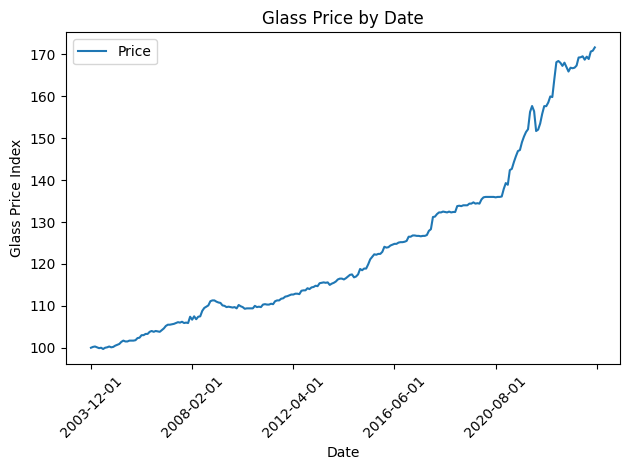

In [ ]:
PPI_Glass.plot.line(x=cN[0], y=cN[1])
plt.title('Glass Price by Date')
plt.xlabel('Date')
plt.ylabel('Glass Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

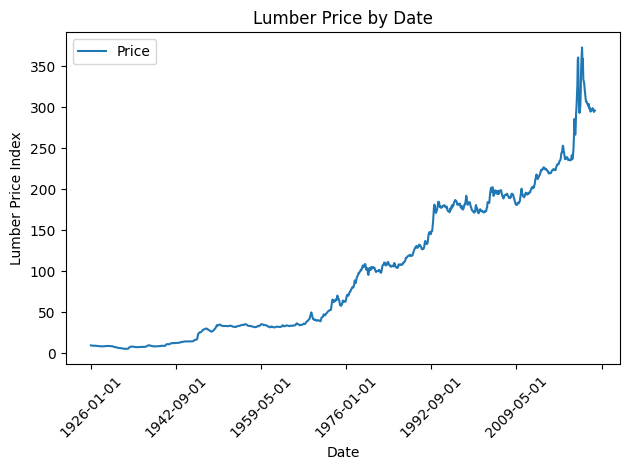

In [ ]:
PPI_Lumber.plot.line(x=cN1[0], y=cN1[1])
plt.title('Lumber Price by Date')
plt.xlabel('Date')
plt.ylabel('Lumber Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

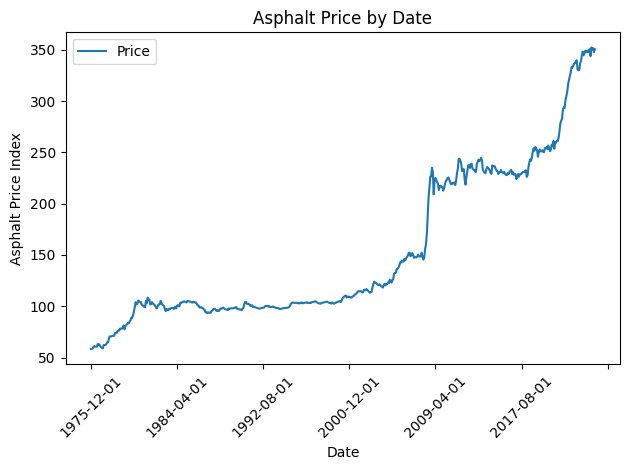

In [ ]:
PPI_Asphalt.plot.line(x=cN2[0], y=cN2[1])
plt.title('Asphalt Price by Date')
plt.xlabel('Date')
plt.ylabel('Asphalt Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

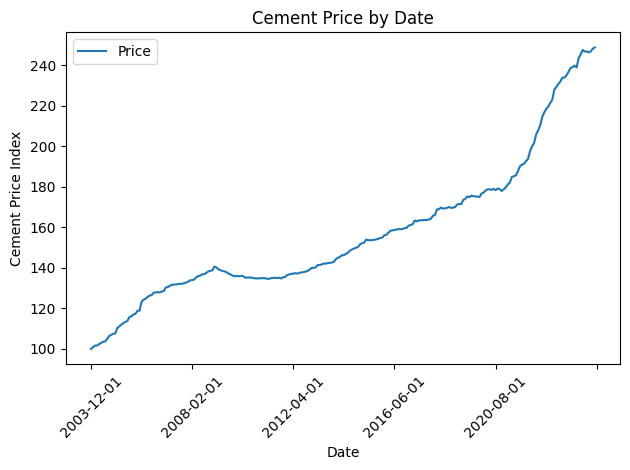

In [ ]:
PPI_Cement.plot.line(x=cN3[0], y=cN3[1])
plt.title('Cement Price by Date')
plt.xlabel('Date')
plt.ylabel('Cement Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

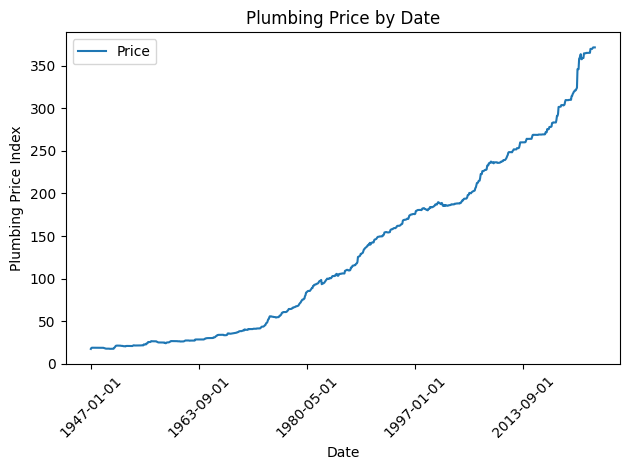

In [ ]:
PPI_Plumbing.plot.line(x=cN4[0], y=cN4[1])
plt.title('Plumbing Price by Date')
plt.xlabel('Date')
plt.ylabel('Plumbing Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

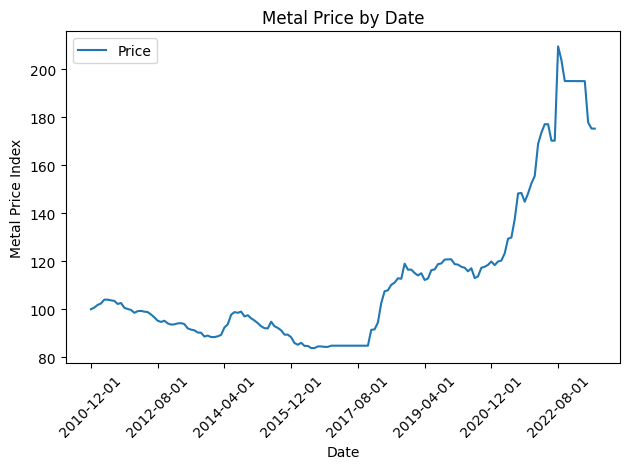

In [ ]:
PPI_Metals.plot.line(x=cN5[0], y=cN5[1])
plt.title('Metal Price by Date')
plt.xlabel('Date')
plt.ylabel('Metal Price Index')
plt.xticks(rotation=45)
plt.tight_layout()

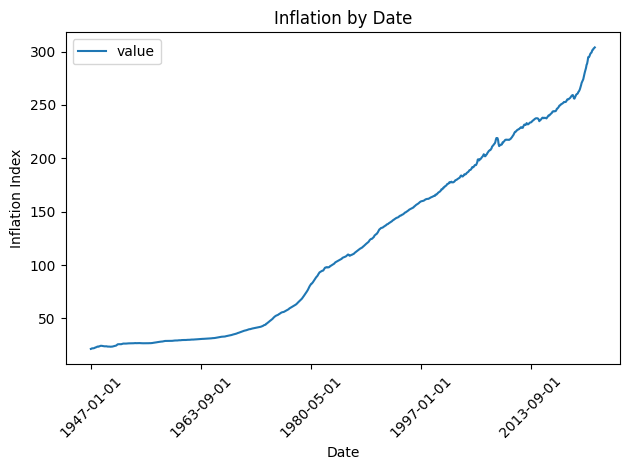

In [ ]:
Inflation.plot.line(x=cN6[0], y=cN6[1])
plt.title('Inflation by Date')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.xticks(rotation=45)
plt.tight_layout()

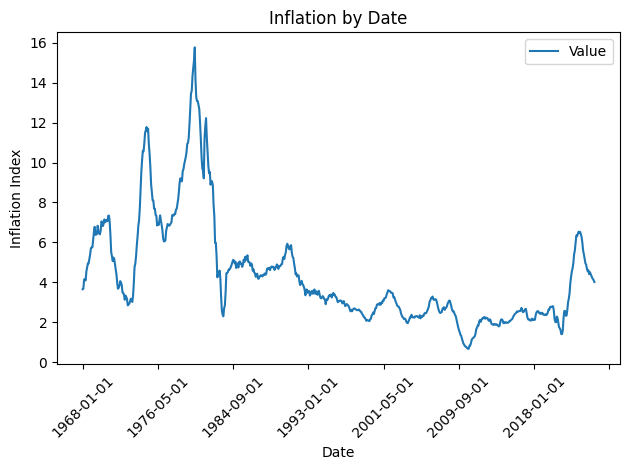

In [ ]:
# Ignore as this dataset will most likely not be used
StickyPrice.plot.line(x=cN7[0], y=cN7[1])
plt.title('Inflation by Date')
plt.xlabel('Date')
plt.ylabel('Inflation Index')
plt.xticks(rotation=45)
plt.tight_layout()

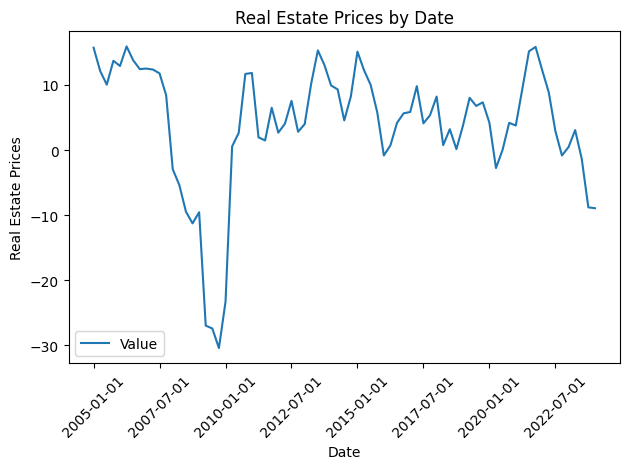

In [ ]:
ComRealPri.plot.line(x=cN8[0], y=cN8[1])
plt.title('Real Estate Prices by Date')
plt.xlabel('Date')
plt.ylabel('Real Estate Prices')
plt.xticks(rotation=45)
plt.tight_layout()

<Axes: xlabel='Price', ylabel='Count'>

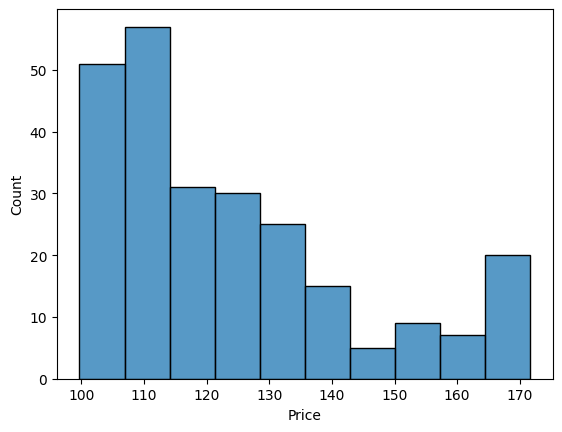

In [ ]:
# Since we are using a lot of different datasets for now I will used the SNS methods just for Glass Prices
sns.histplot(PPI_Glass,x=cN[1])

<Axes: xlabel='Price', ylabel='Density'>

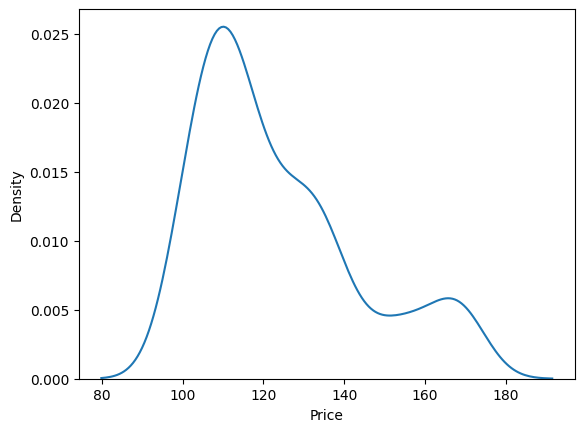

In [ ]:
sns.kdeplot(PPI_Glass,x=cN[1])

<Axes: xlabel='Price', ylabel='count'>

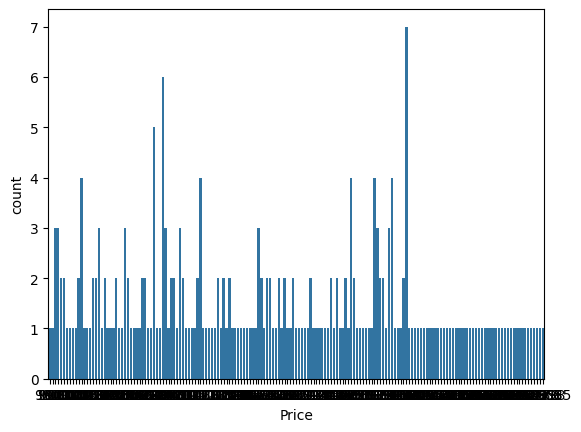

In [ ]:
sns.countplot(PPI_Glass,x=cN[1])

<Axes: xlabel='Price'>

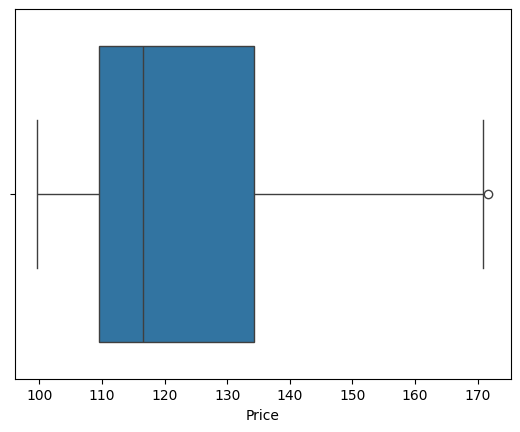

In [ ]:
sns.boxplot(PPI_Glass,x=cN[1])

<Axes: xlabel='Price'>

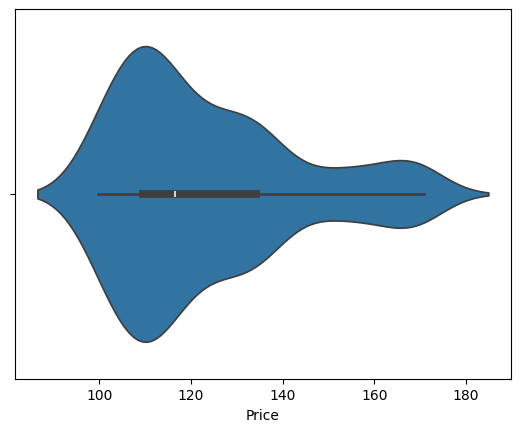

In [ ]:
sns.violinplot(PPI_Glass,x=cN[1])

# (3) Two-Feature Plots - LJ
For this section, we are asked to show an example of sns.scatterplot, sns.swarmplot, and sns.stripplot with alterations to the Hue, Style, and Size.

## Scatter Plot
For the scatterplot, I will be showing values for some of the states in the Zillow Dataset. For now, I will be showing California, Texas, Florida, and New York.

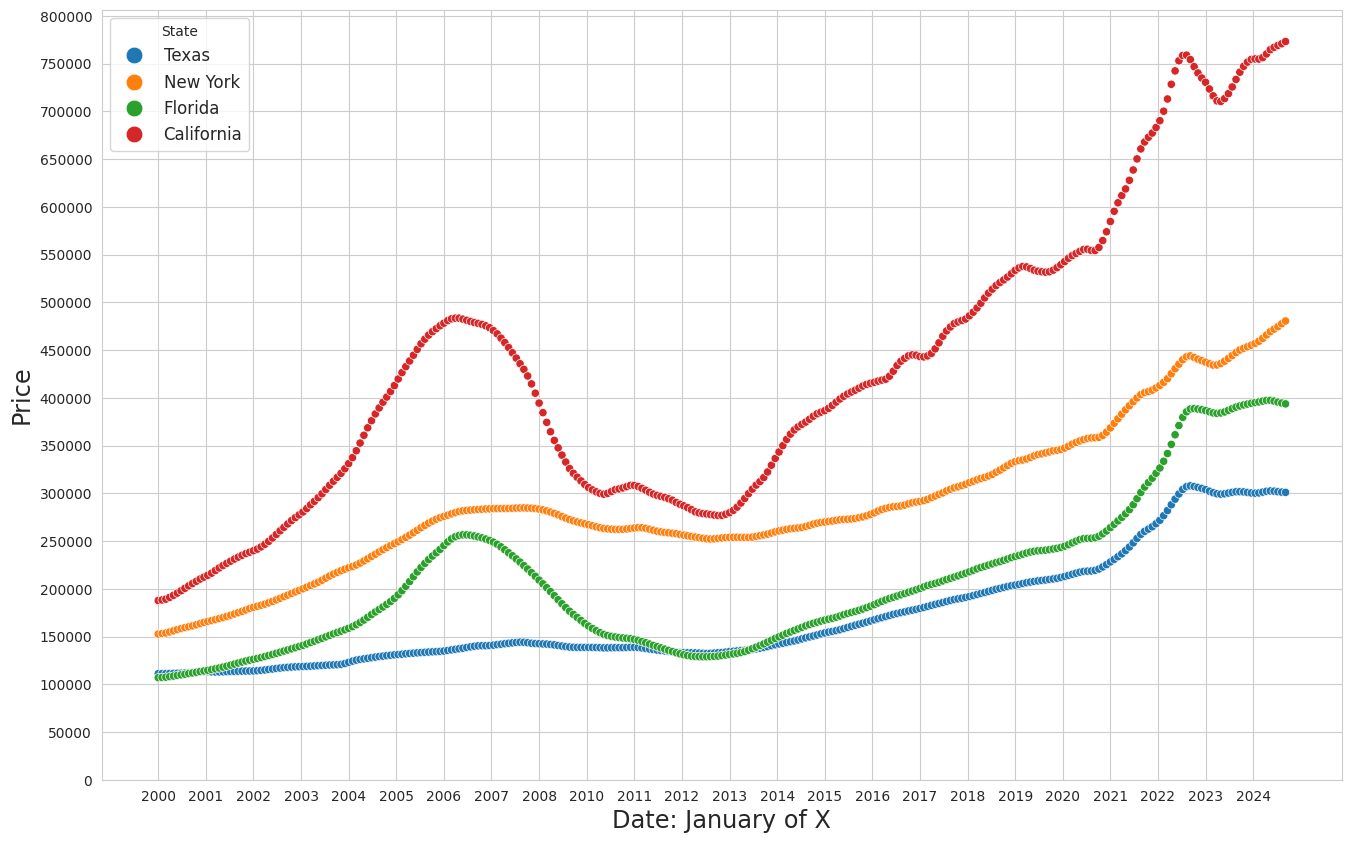

In [86]:
Zillow_long = pd.melt(Zillow, id_vars=Zillow.columns[0],
                     value_vars=[Zillow.columns[i] for i in [6, 4, 3, 2]],  # Texas, New York, Florida, California
                     var_name='State_Name', value_name='State')
Zillow_long = Zillow_long.rename(columns={Zillow.columns[0]: 'Date'})

plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
plt.xlabel("Date: January of X",  fontsize = "xx-large")
plt.ylabel("Price", fontsize = "xx-large")
sns.scatterplot(data=Zillow_long,x=Zillow_long.Date,y=Zillow_long.State, hue='State_Name')
plt.yticks(range(0, int(Zillow_long['State'].max()) + 50000, 50000))
plt.minorticks_off
plt.xscale("linear")
plt.xticks(minor = True)
plt.xticks(ticks = [0, 12.5, 25, 37.5, 50, 62.5, 75, 87.5, 100, 112.5, 125, 137.5, 150, 162.5, 175, 187.5, 200, 212.5, 225, 237.5, 250, 262.5, 275, 287.5],
           labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"])
plt.legend(title='State', loc='upper left', fontsize="12", markerscale=2)

This scatter plot shows that the prices of houses in four of the biggest markets in the United States have risen, strangely both Florida and California had major spikes in housing cost from the years of 2004 to 2008. Neither Texas of New York had such a spike in that time period.

## Strip Plot
For our strip plot, I have decided to include the data on all 50 states, it's somewhat difficult to look at, but zooming in allows you to follow an individual states values over time.

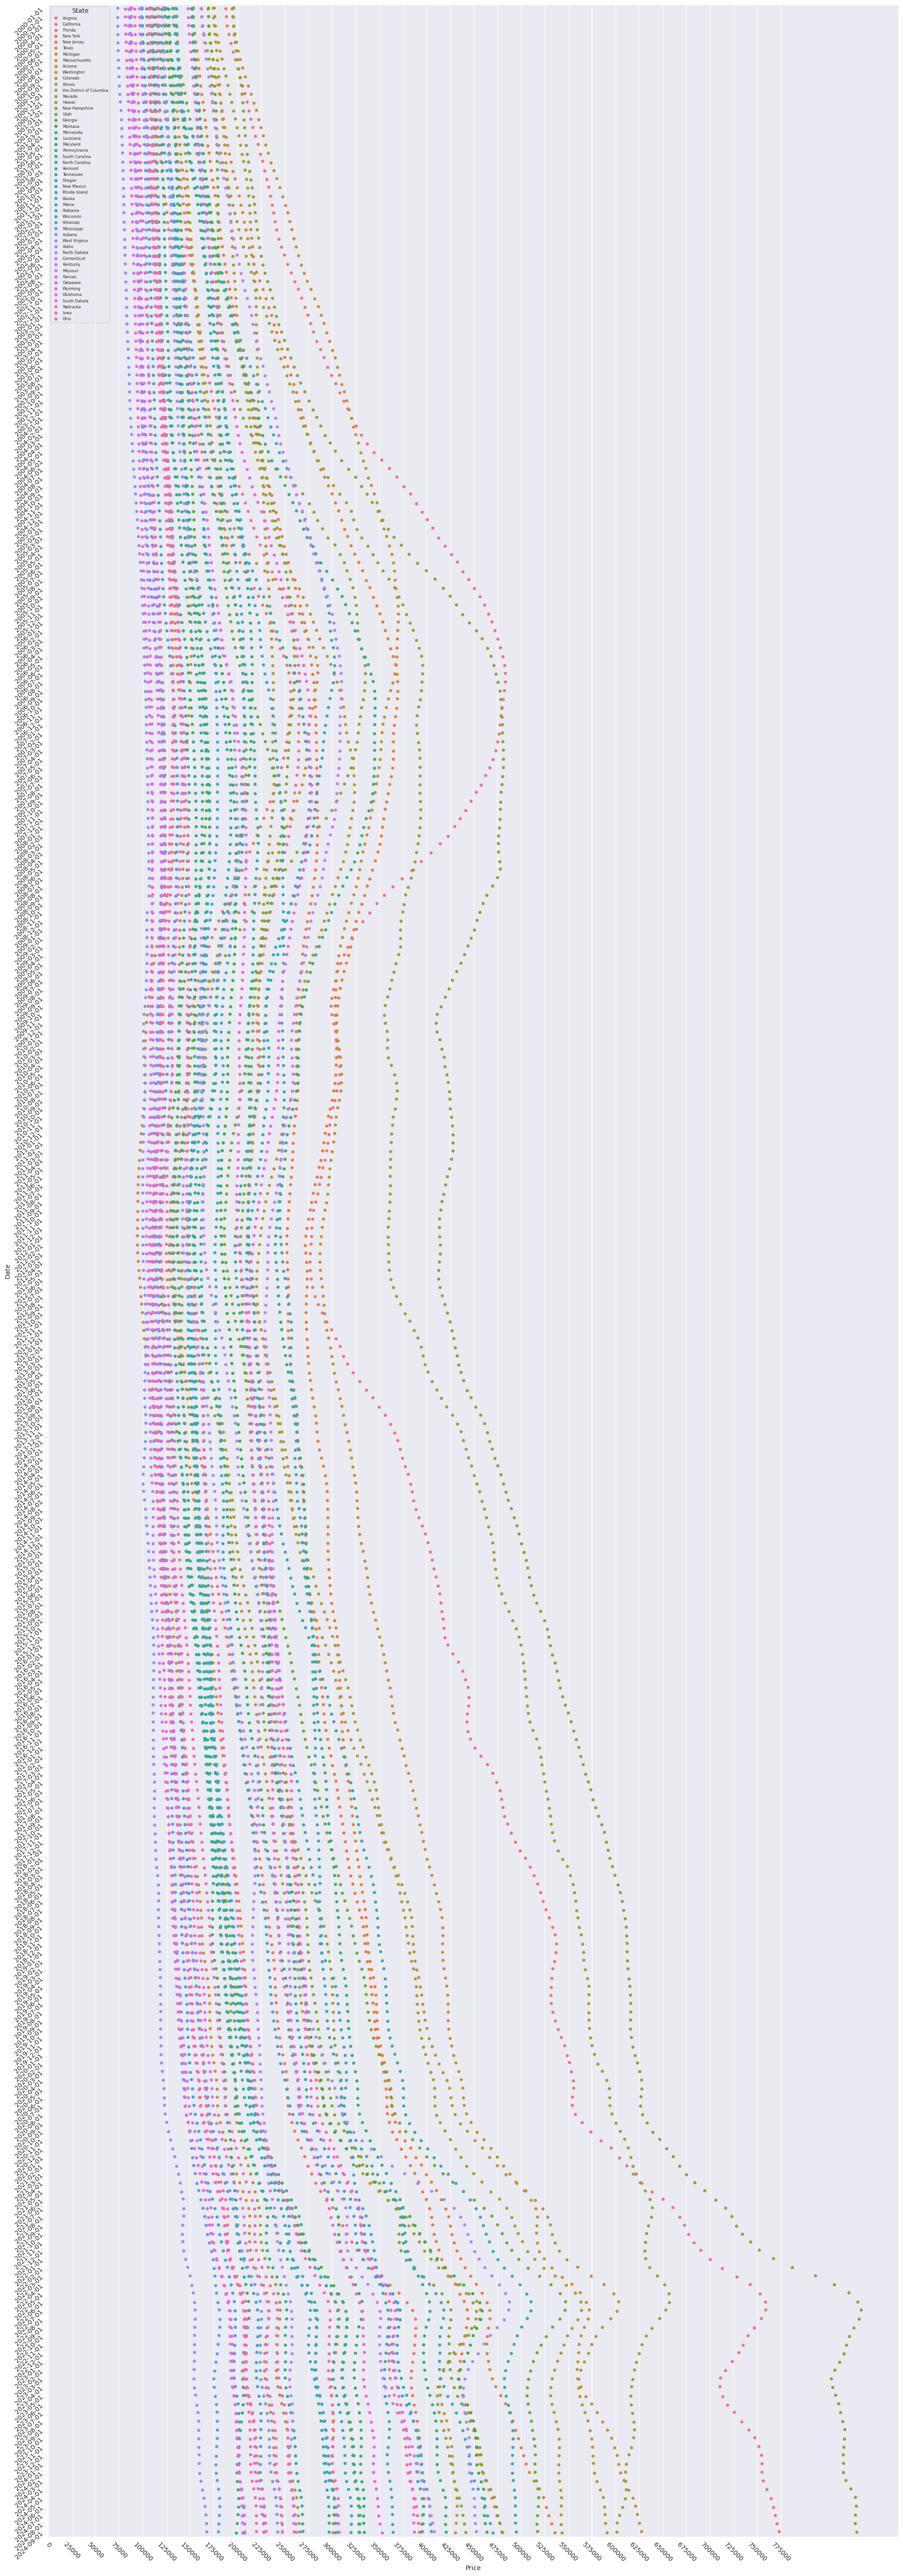

In [94]:
ZillowFull = pd.melt(Zillow, id_vars=Zillow.columns[0],
                     value_vars=[Zillow.columns[i] for i in range(1, 52)],
                     var_name='State_Name', value_name='State')
ZillowFull = ZillowFull.rename(columns={Zillow.columns[0]: 'Date'})
sns.set_style("darkgrid")
plt.figure(figsize=(24,72))
sns.stripplot(ZillowFull,x=ZillowFull.State, y=ZillowFull.Date,hue='State_Name')
plt.xticks(range(0, int(Zillow_long['State'].max()) + 25000, 25000))
plt.yticks(rotation = 45)
plt.xlabel("Price")
plt.xticks(rotation=-45)
plt.legend(title='State', loc='upper left', fontsize="6", markerscale=1)

The strip plot shows what happens when you put to much data into a individual point foces plot. These are better represented as bar or line plots. But it is still easy to see that housing prices have gone up in all states. Now we need to compare them to infations rate of increase.

## Swarm plot
Lastly our swarmplot. It is covering the states of California, Texas, Florida, Vermont, Michigan, Arizona, and Colorado. It compares price against time for each of the states

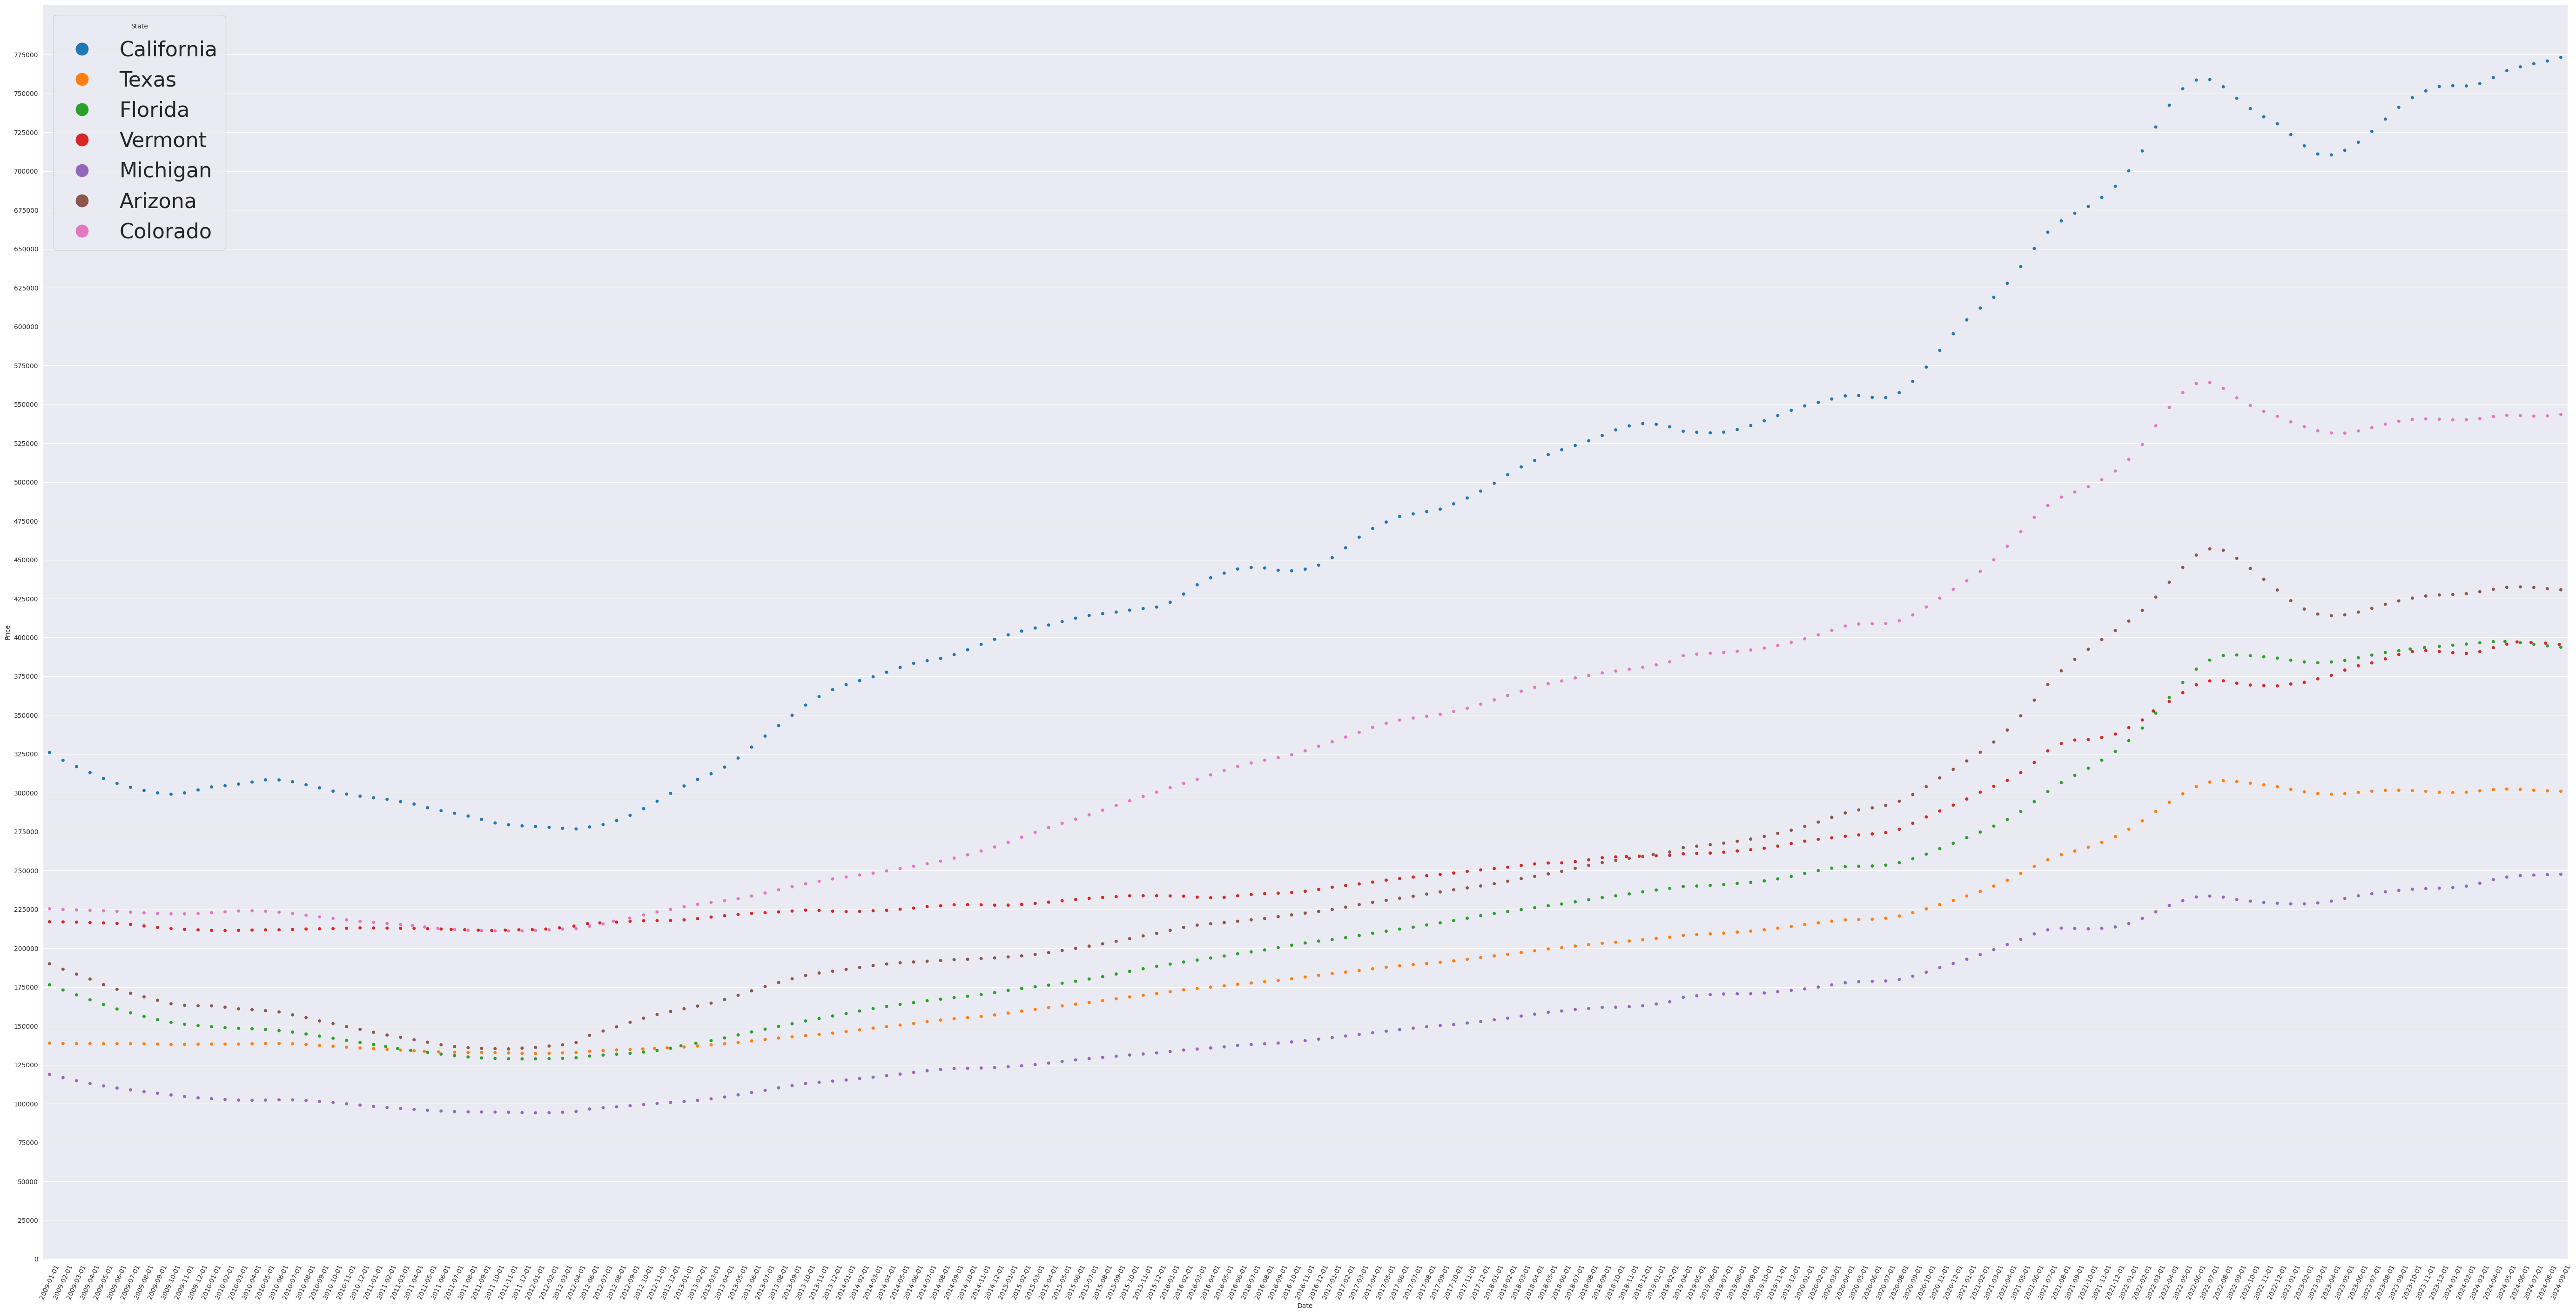

In [ ]:
ZillowEdit = Zillow
ZillowEdit = ZillowEdit.rename(columns={ZillowEdit.columns[0]: 'Date'})
ZillowEdit = ZillowEdit.dropna()
ZillowEditmelted = pd.melt(ZillowEdit, id_vars='Date', value_vars=['California', 'Texas', 'Florida', 'Vermont', 'Michigan', 'Arizona', 'Colorado'], var_name='State', value_name='Price')
plt.figure(figsize=(70,35))
plt.xticks(rotation=65)
sns.swarmplot(x='Date', y='Price', hue='State', data=ZillowEditmelted)
plt.legend(title='State', loc='upper left', fontsize="32", markerscale=4)
plt.yticks(range(0, int(Zillow_long['State'].max()) + 25000, 25000))
plt.show()
#print(ZillowEditmelted)

This plot like the scatterplot shows that as one states prices of homes increases, it normally does in all the states.

# (4) Summarization of Data - LJ
Summarizes the data using df.shape, df.info(), and df.describe(include = "all")

## Zillow

In [ ]:
ZillowRound = Zillow
ZillowRound.shape
ZillowRound.info()
ZillowRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      297 non-null    object 
 1   Virginia                  297 non-null    float64
 2   California                297 non-null    float64
 3   Florida                   297 non-null    float64
 4   New York                  297 non-null    float64
 5   New Jersey                297 non-null    float64
 6   Texas                     297 non-null    float64
 7   Michigan                  297 non-null    float64
 8   Massachusetts             297 non-null    float64
 9   Arizona                   296 non-null    float64
 10  Washington                297 non-null    float64
 11  Colorado                  297 non-null    float64
 12  Illinois                  297 non-null    float64
 13  the District of Columbia  297 non-null    float64
 14  Nevada    

Date   Virginia  California    Florida   New York  New Jersey  \
count          297     297.00      297.00     297.00     297.00      297.00   
unique         297        NaN         NaN        NaN        NaN         NaN   
top     2000-01-01        NaN         NaN        NaN        NaN         NaN   
freq             1        NaN         NaN        NaN        NaN         NaN   
mean           NaN  242488.31   429145.13  207179.48  288656.41   322526.22   
std            NaN   63730.11   156266.88   79452.69   77960.39    79099.36   
min            NaN  123345.47   187686.83  106914.49  152590.52   168867.68   
25%            NaN  214351.97   301556.59  144823.91  253787.07   278516.15   
50%            NaN  237064.01   412385.37  188508.75  273168.67   310641.73   
75%            NaN  265324.56   523548.17  243882.46  326718.84   357889.49   
max            NaN  392433.70   773239.12  397409.76  480515.87   535982.35   

            Texas   Michigan  Massachusetts    Arizona  ...   Kentucky  \
count      297.00     297.00         297.00     296.00  ...     297.00   
unique        NaN        NaN            NaN        NaN  ...        NaN   
top           NaN        NaN            NaN        NaN  ...        NaN   
freq          NaN        NaN            NaN        NaN  ...        NaN   
mean    170325.95  147371.77      365521.56  233011.82  ...  122494.35   
std      58160.31   40109.98       99571.81   89852.06  ...   31943.86   
min     111067.07   94106.30      194441.92  134673.83  ...   84888.60   
25%     132901.50  121184.68      303774.76  160742.17  ...  104538.12   
50%     141492.32  139304.56      341643.68  207504.59  ...  109412.20   
75%     201412.42  160608.48      412832.63  272287.70  ...  132860.29   
max     307825.49  247637.93      627595.55  457001.58  ...  207826.31   

         Missouri     Kansas   Delaware    Wyoming   Oklahoma  South Dakota  \
count      297.00     297.00     297.00     270.00     297.00        296.00   
unique        NaN        NaN        NaN        NaN        NaN           NaN   
top           NaN        NaN        NaN        NaN        NaN           NaN   
freq          NaN        NaN        NaN        NaN        NaN           NaN   
mean    147074.45  132035.81  250994.49  227735.07  122222.99     174020.48   
std      38018.71   35251.78   58175.47   53584.35   32100.63      56257.25   
min      96355.62   87834.71  147889.12  143894.46   81317.07     107542.72   
25%     123671.96  112836.89  216604.69  200597.70  103589.95     138535.78   
50%     134960.05  118984.89  246237.74  214299.00  110293.63     150640.97   
75%     157237.97  143458.38  273233.50  245455.18  130922.18     199129.85   
max     247481.75  228299.14  387158.40  353249.78  205645.53     307798.78   

         Nebraska       Iowa       Ohio  
count      297.00     297.00     297.00  
unique        NaN        NaN        NaN  
top           NaN        NaN        NaN  
freq          NaN        NaN        NaN  
mean    151438.91  136942.68  137675.35  
std      41923.50   33495.73   32365.92  
min     107906.33   91262.66  105495.85  
25%     125520.84  117911.36  116621.97  
50%     131850.81  122889.18  126542.66  
75%     168436.58  152967.51  143455.34  
max     260097.15  220188.40  230249.78  

[11 rows x 52 columns]

## Commercial Real Estate Prices

In [ ]:
ComRealPriRound = ComRealPri
ComRealPri.shape
ComRealPri.info()
ComRealPri.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    77 non-null     object 
 1   Value   77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


DATE  Value
count           77  77.00
unique          77    NaN
top     2005-01-01    NaN
freq             1    NaN
mean           NaN   3.99
std            NaN   9.79
min            NaN -30.40
25%            NaN   0.73
50%            NaN   5.35
75%            NaN  10.29
max            NaN  15.92

## Sticky Price

In [ ]:
StickyPriceRound = StickyPrice
StickyPriceRound.shape
StickyPriceRound.info()
StickyPriceRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    681 non-null    object 
 1   Value   681 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.8+ KB


DATE   Value
count          681  681.00
unique         681     NaN
top     1968-01-01     NaN
freq             1     NaN
mean           NaN    4.33
std            NaN    2.68
min            NaN    0.66
25%            NaN    2.46
50%            NaN    3.38
75%            NaN    5.18
max            NaN   15.77

## U.S. Inflation Database

In [ ]:
InflationRound = Inflation
InflationRound.shape
InflationRound.info()
InflationRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    918 non-null    object 
 1   value   918 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.5+ KB


date   value
count          918  918.00
unique         918     NaN
top     1947-01-01     NaN
freq             1     NaN
mean           NaN  117.79
std            NaN   83.74
min            NaN   21.48
25%            NaN   32.10
50%            NaN  106.90
75%            NaN  188.00
max            NaN  303.84

## PPI-Glass

In [ ]:
PPI_GlassRound = PPI_Glass
PPI_GlassRound.shape
PPI_GlassRound.info()
PPI_GlassRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


DATE   Price
count          250  250.00
unique         250     NaN
top     2003-12-01     NaN
freq             1     NaN
mean           NaN  123.64
std            NaN   19.93
min            NaN   99.70
25%            NaN  109.52
50%            NaN  116.50
75%            NaN  134.30
max            NaN  171.68

## PPI-Lumber

In [ ]:
PPI_LumberRound = PPI_Lumber
PPI_LumberRound.shape
PPI_LumberRound.info()
PPI_LumberRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1185 non-null   object 
 1   Price   1185 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


DATE    Price
count         1185  1185.00
unique        1185      NaN
top     1926-01-01      NaN
freq             1      NaN
mean           NaN   100.04
std            NaN    87.33
min            NaN     5.30
25%            NaN    31.60
50%            NaN    64.90
75%            NaN   179.70
max            NaN   372.86

## PPI-Plumbing

In [ ]:
PPI_PlumbingRound = PPI_Plumbing
PPI_PlumbingRound.shape
PPI_PlumbingRound.info()
PPI_PlumbingRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933 entries, 0 to 932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    933 non-null    object 
 1   Price   933 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.7+ KB


DATE   Price
count          933  933.00
unique         933     NaN
top     1947-01-01     NaN
freq             1     NaN
mean           NaN  130.91
std            NaN  101.39
min            NaN   17.40
25%            NaN   32.90
50%            NaN  106.00
75%            NaN  198.70
max            NaN  371.57

## PPI-Metals

In [ ]:
PPI_MetalsRound = PPI_Metals
PPI_MetalsRound.shape
PPI_MetalsRound.info()
PPI_MetalsRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    152 non-null    object 
 1   Price   152 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


DATE   Price
count          152  152.00
unique         152     NaN
top     2010-12-01     NaN
freq             1     NaN
mean           NaN  112.50
std            NaN   31.33
min            NaN   83.80
25%            NaN   91.57
50%            NaN  100.05
75%            NaN  118.65
max            NaN  209.58

## PPI-Cement

In [ ]:
PPI_CementRound = PPI_Cement
PPI_CementRound.shape
PPI_CementRound.info()
PPI_CementRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    250 non-null    object 
 1   Price   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


DATE   Price
count          250  250.00
unique         250     NaN
top     2003-12-01     NaN
freq             1     NaN
mean           NaN  157.06
std            NaN   35.31
min            NaN  100.00
25%            NaN  135.00
50%            NaN  146.30
75%            NaN  174.98
max            NaN  248.84

## PPI-Shingles

In [ ]:
PPI_AsphaltRound = PPI_Asphalt
PPI_AsphaltRound.shape
PPI_AsphaltRound.info()
PPI_AsphaltRound.describe(include = 'all').round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    586 non-null    object 
 1   Price   586 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


DATE   Price
count          586  586.00
unique         586     NaN
top     1975-12-01     NaN
freq             1     NaN
mean           NaN  153.97
std            NaN   76.72
min            NaN   58.40
25%            NaN   99.10
50%            NaN  108.45
75%            NaN  228.90
max            NaN  352.30

# (5) Visualization of Data - LJ
Here we will be showing the requested histogram, boxplot, and scatter matrix

## Histogram
To spare our computing power, I will not do this to the Zillow Dataset, Instead I will apply this to all of the PPI datasets.

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

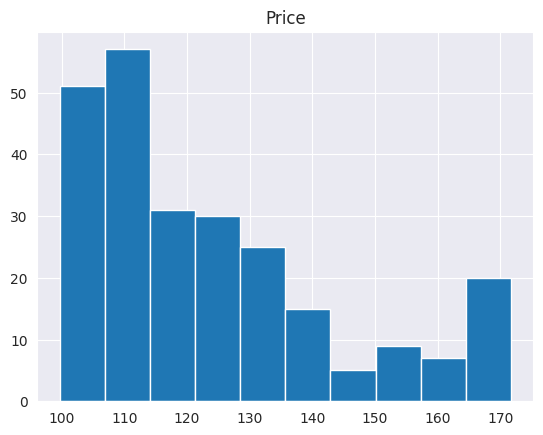

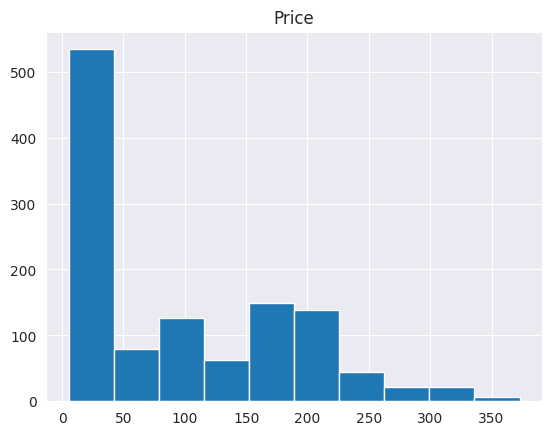

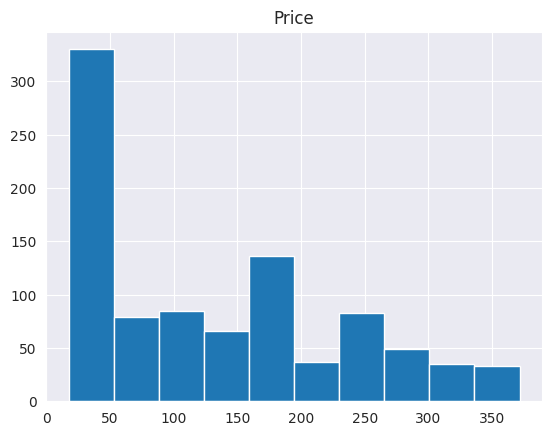

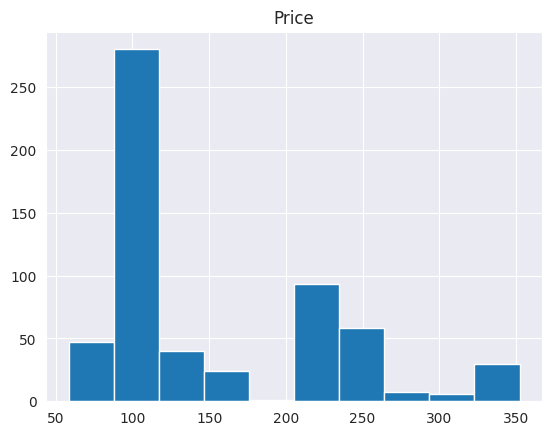

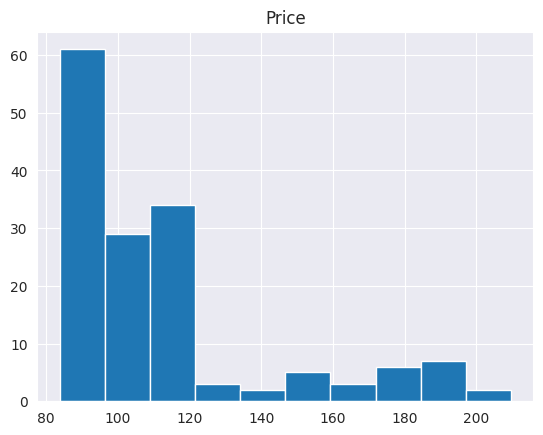

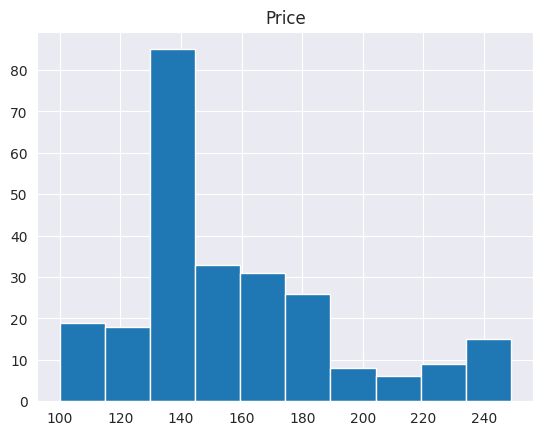

In [ ]:
PPI_Glass.hist()
PPI_Lumber.hist()
PPI_Plumbing.hist()
PPI_Asphalt.hist()
PPI_Metals.hist()
PPI_Cement.hist()

As far as useful or interesting results, I need to finish cleaning and augmenting these datasets to gain something from them.

## Boxplot
For the boxplot, I think the best looking of the options is the Inflation Dataset.

<Axes: >

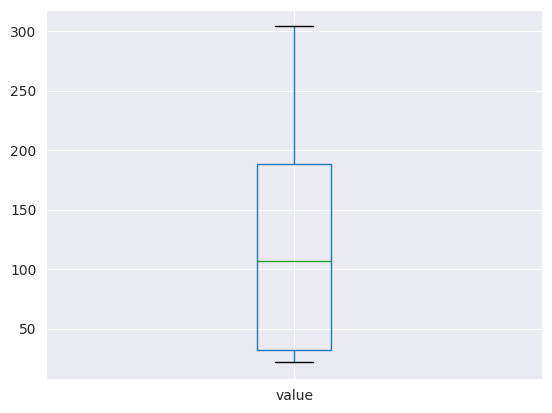

In [ ]:
Inflation.boxplot()

The Boxplot shows us that the values are focused on the lower side, with a few big outliers.

## Scatter Matrix
For the scatter matrix, I have combined the PPI_Glass and PPI_Lumber into a single dataset, so that they can be compared against eachother

array([[<Axes: xlabel='Price_x', ylabel='Price_x'>,
        <Axes: xlabel='Price_y', ylabel='Price_x'>],
       [<Axes: xlabel='Price_x', ylabel='Price_y'>,
        <Axes: xlabel='Price_y', ylabel='Price_y'>]], dtype=object)

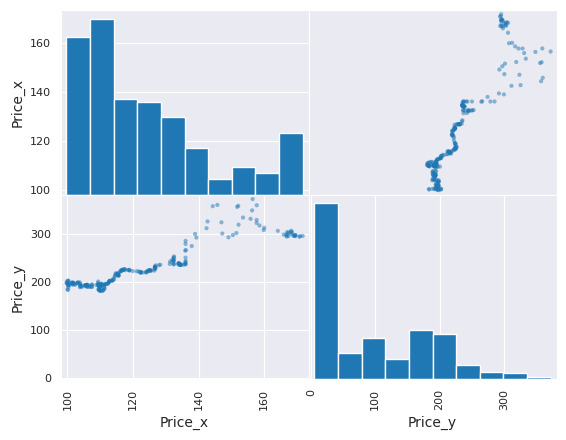

In [ ]:
GVL = pd.merge(PPI_Glass, PPI_Lumber, on='DATE', how='outer')
pd.plotting.scatter_matrix(GVL)

I still don't fully understand what this is trying to show. So i can't easily comment on what useful data it point out

# (6) Detecting Outliers - LJ

It's worth mentioning that our datasets obtained from Kaggle are unlikely to have any unatural outliers. So, this will primarly focus on non-kaggle datasets.

## PPI-Glass
Using the scatter plot below to look for extreme outliers, I don't notice any, I should use some of the mathematical methods to look for them when time allows.

<Axes: xlabel='DATE', ylabel='Price'>

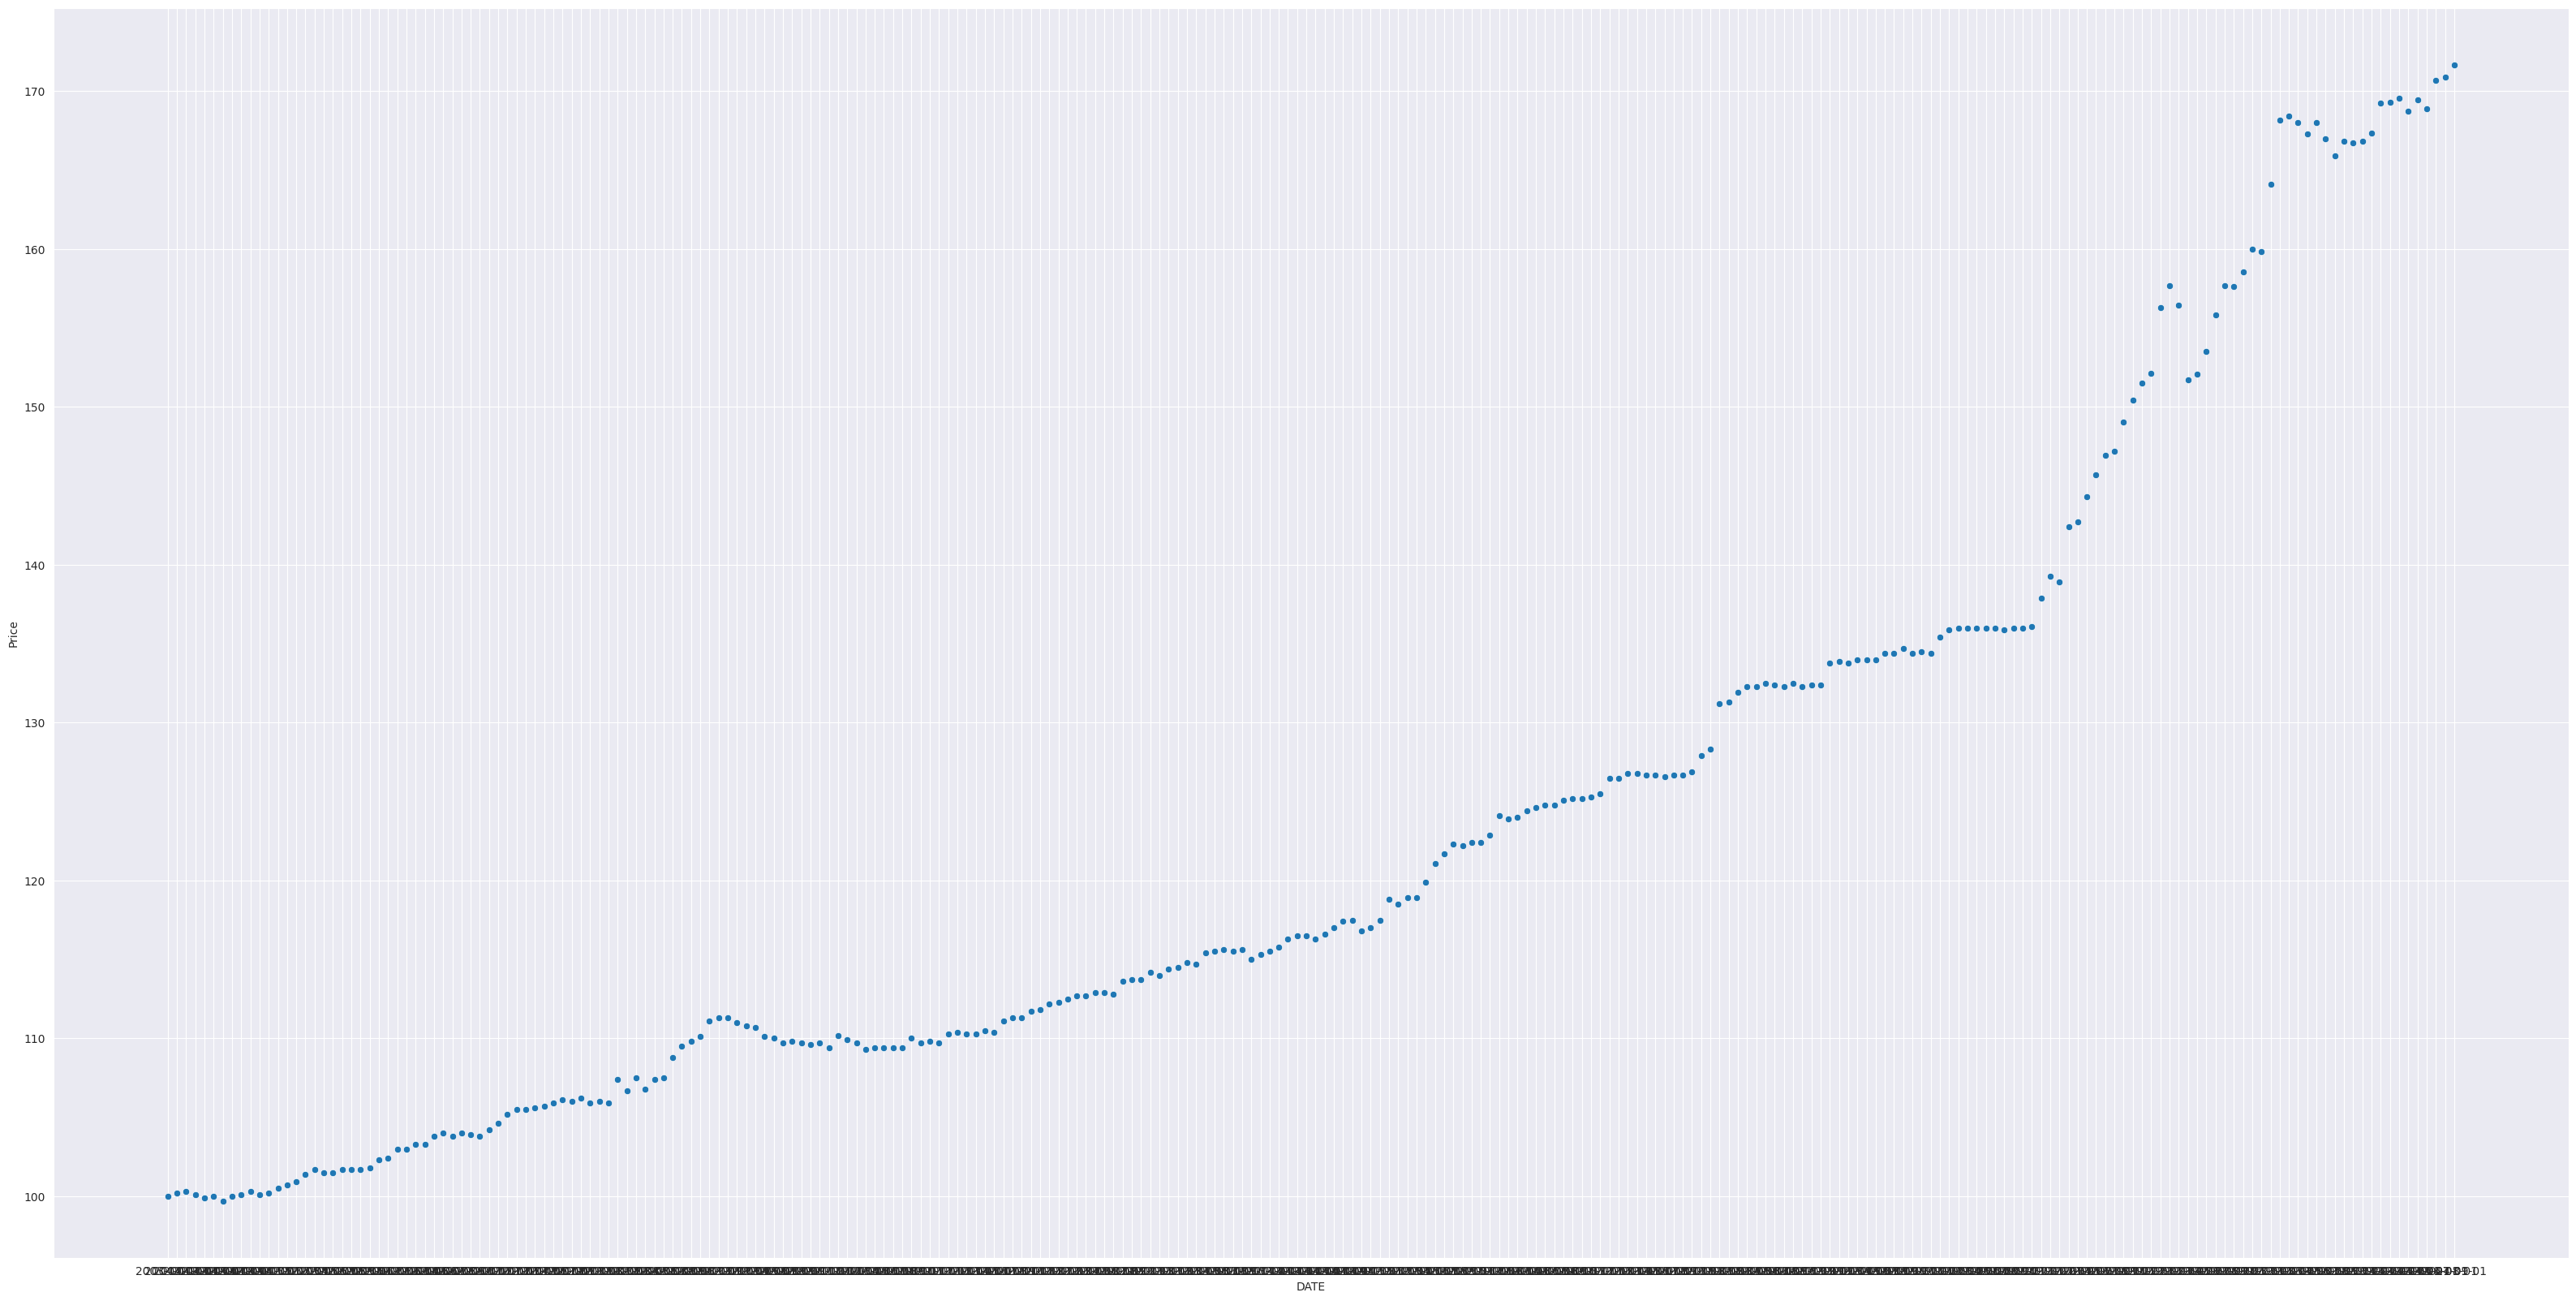

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(PPI_Glass, x = PPI_Glass.columns[0], y = PPI_Glass.columns[1])

## PPI-Lumber
Lumber seems to have a few outliers near the end, but I will still need to confirm with the mathematical methods.

<Axes: xlabel='DATE', ylabel='Price'>

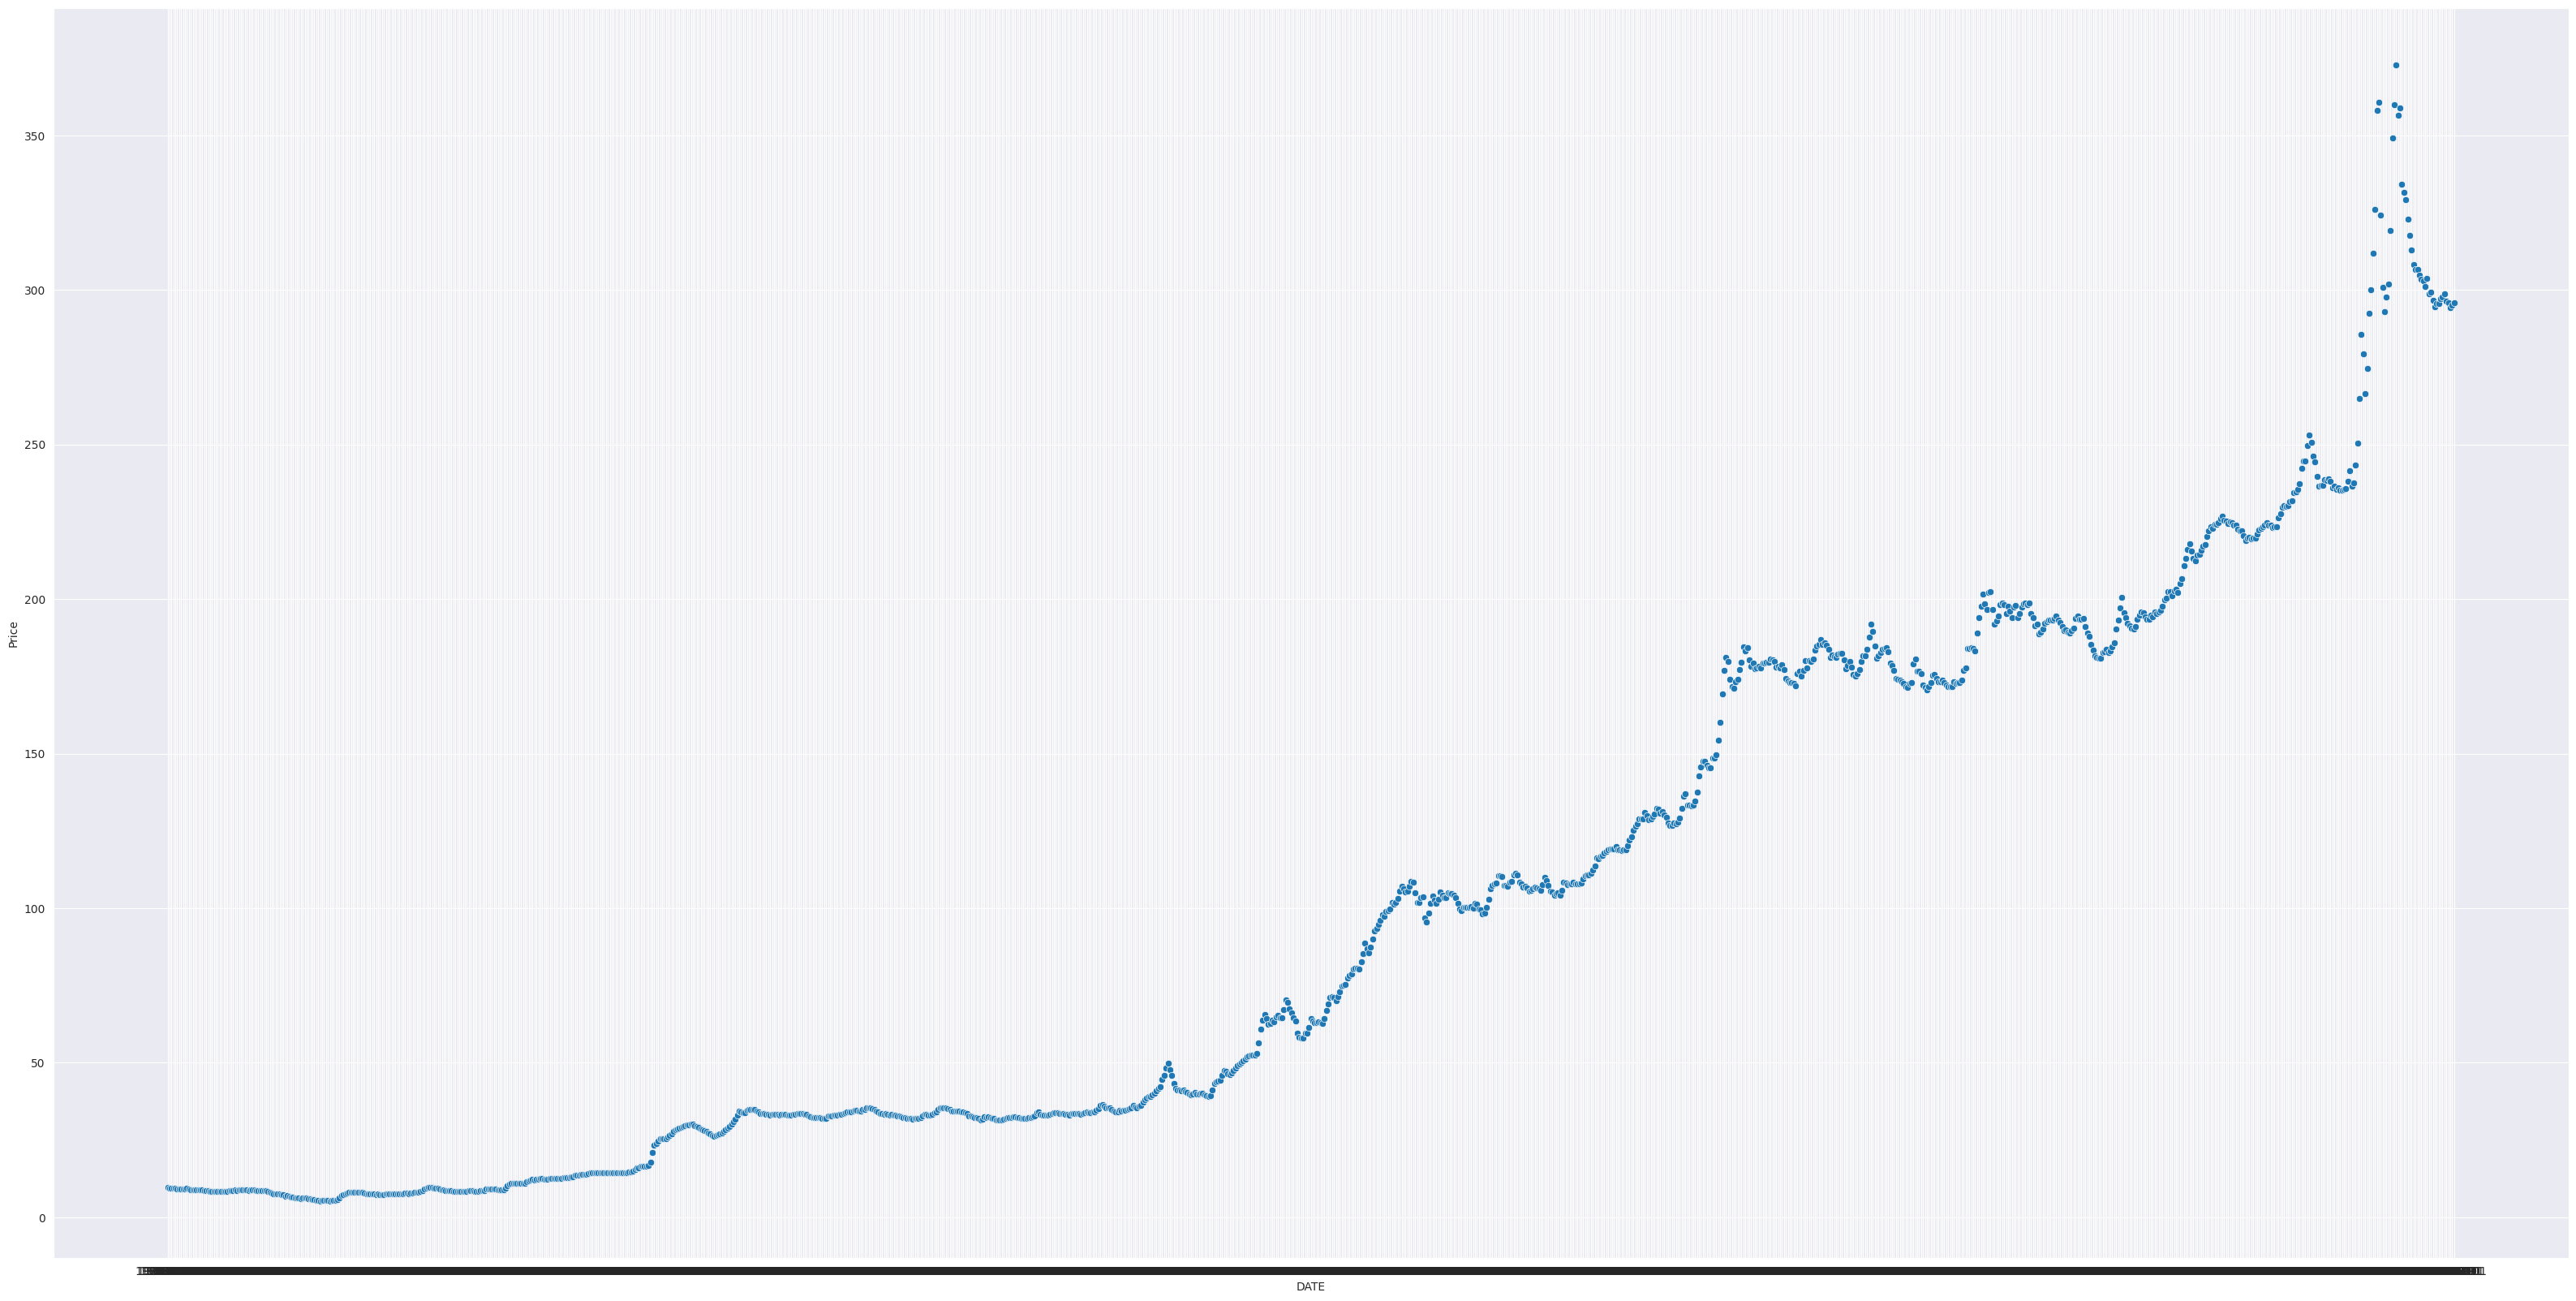

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(PPI_Lumber, x = PPI_Lumber.columns[0], y = PPI_Lumber.columns[1])

## PPI-Plumbing
I'm not seeing any points that scream outlier, but will comfirm with math.

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(PPI_Plumbing, x = PPI_Plumbing.columns[0], y = PPI_Plumbing.columns[1])

<Axes: xlabel='DATE', ylabel='Price'>

## PPI-Asphalt
Unlike the others, this data has a section where the points seem to be jumping around a lot, will need to look into that. Also a major spike over a few months, should look into what happened on those dates

<Axes: xlabel='DATE', ylabel='Price'>

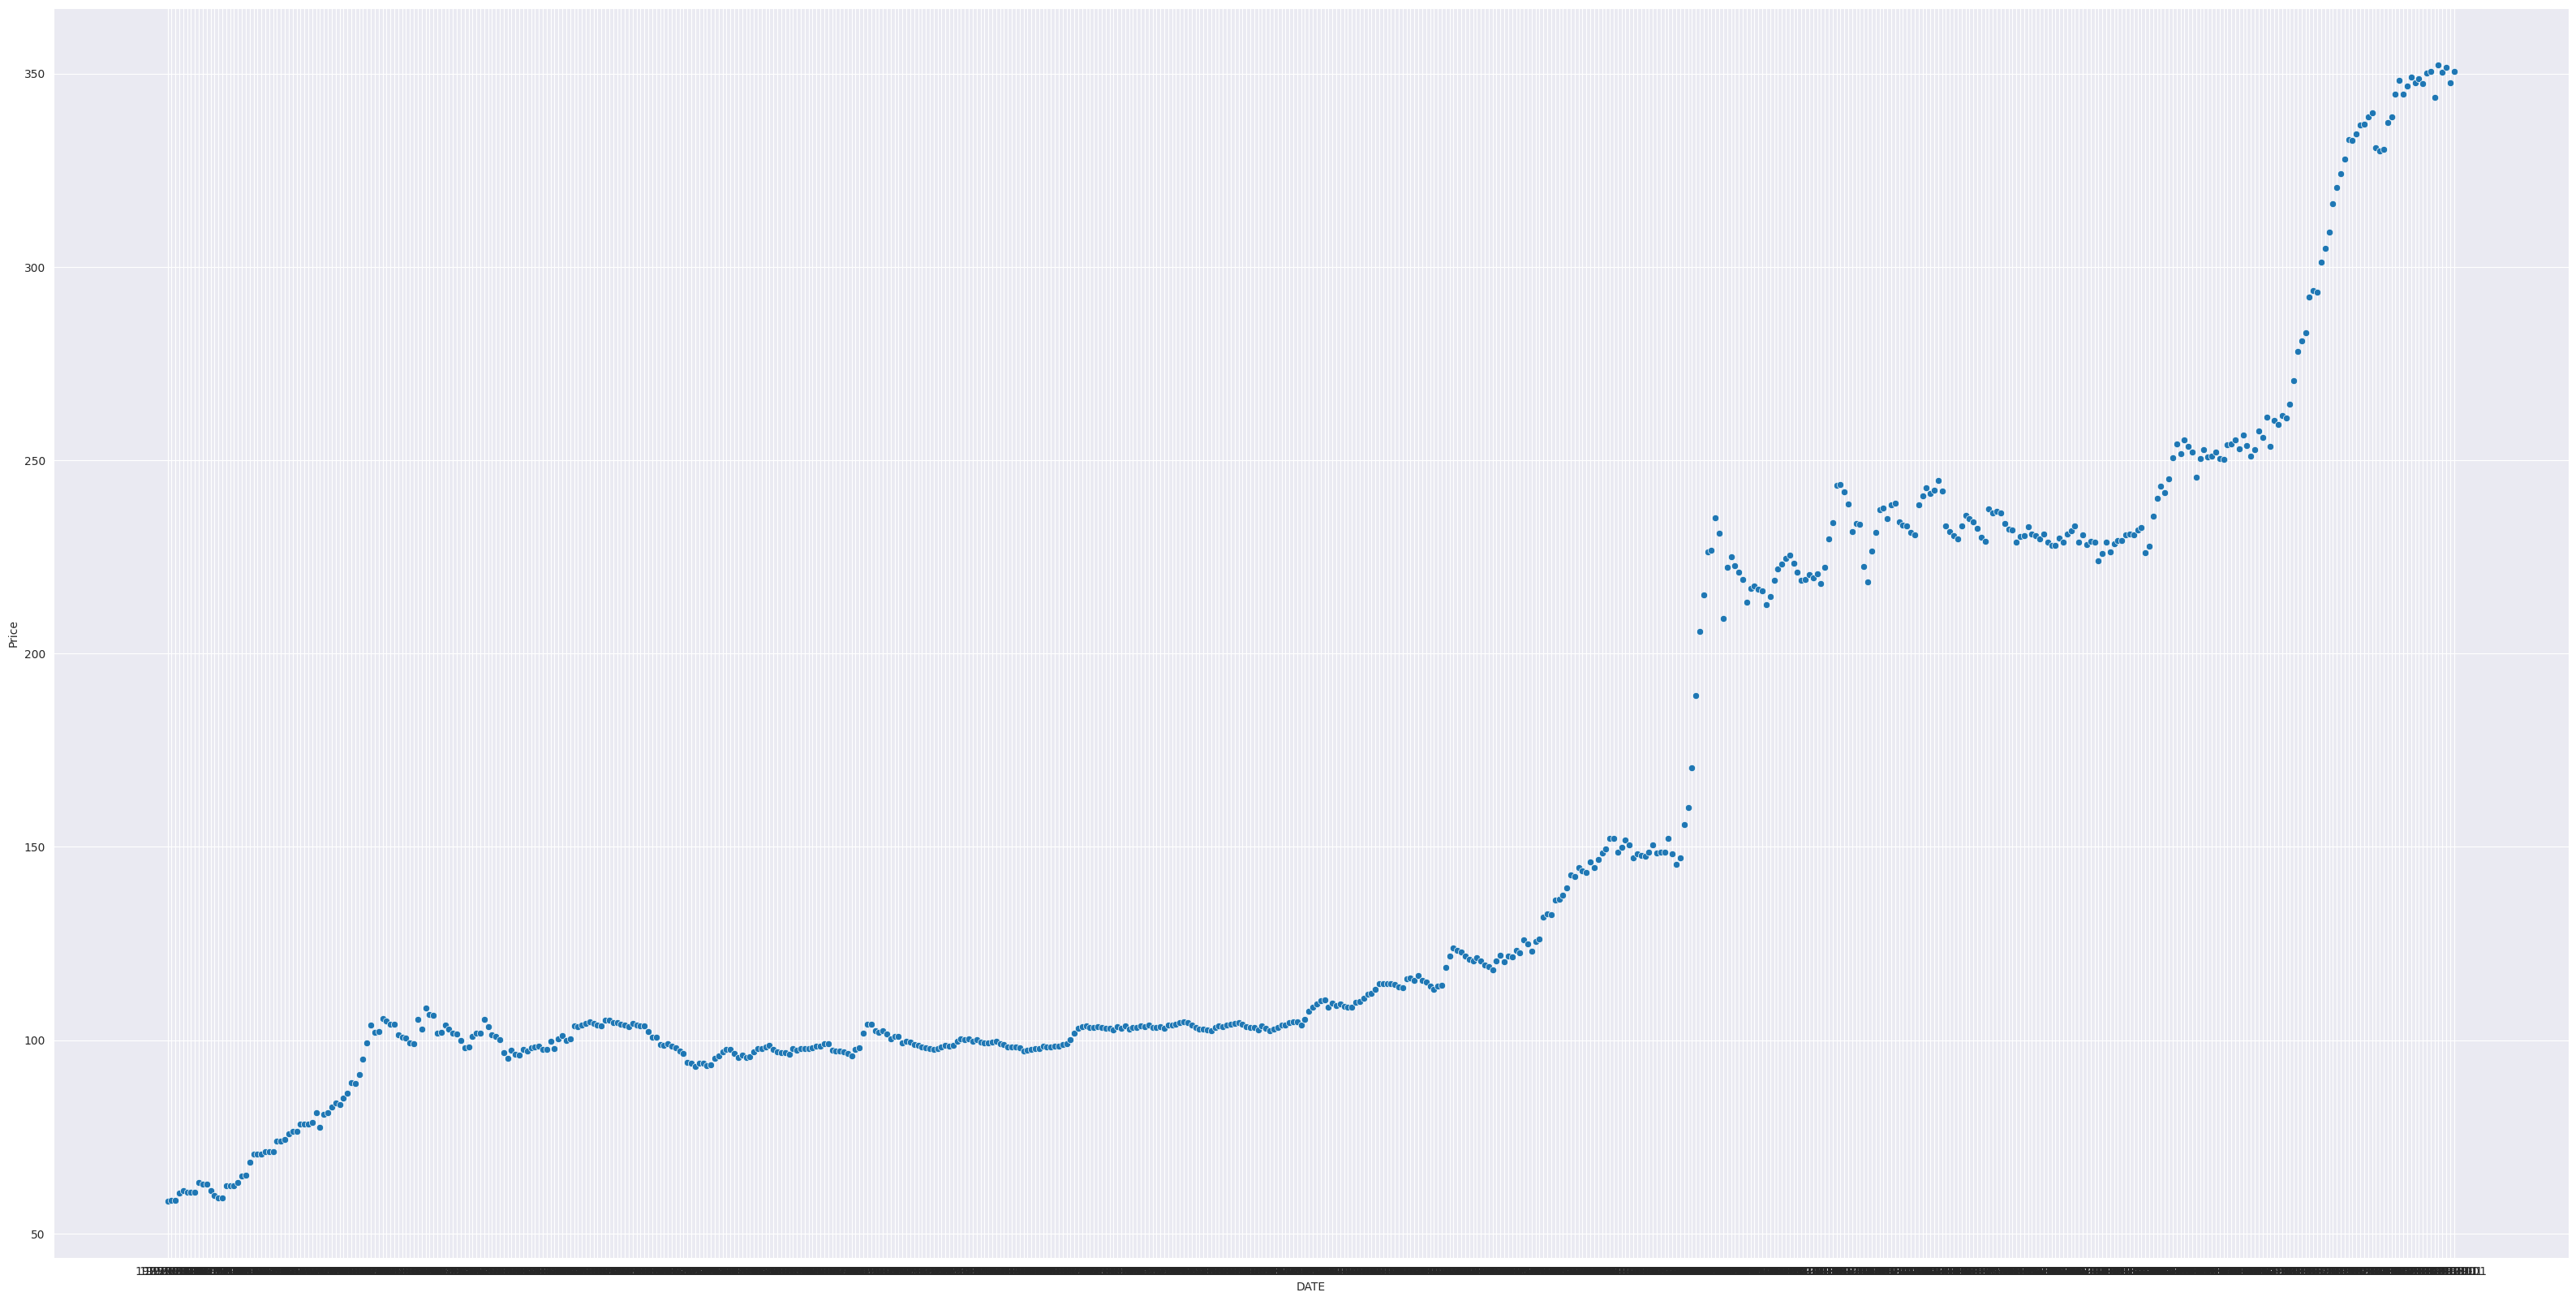

In [54]:
plt.figure(figsize=(40,20))
sns.scatterplot(PPI_Asphalt, x = PPI_Asphalt.columns[0], y = PPI_Asphalt.columns[1])

## PPI-Cement
Appears fairly clean of outliers, mathmatical analysis likely unecessary

<Axes: xlabel='DATE', ylabel='Price'>

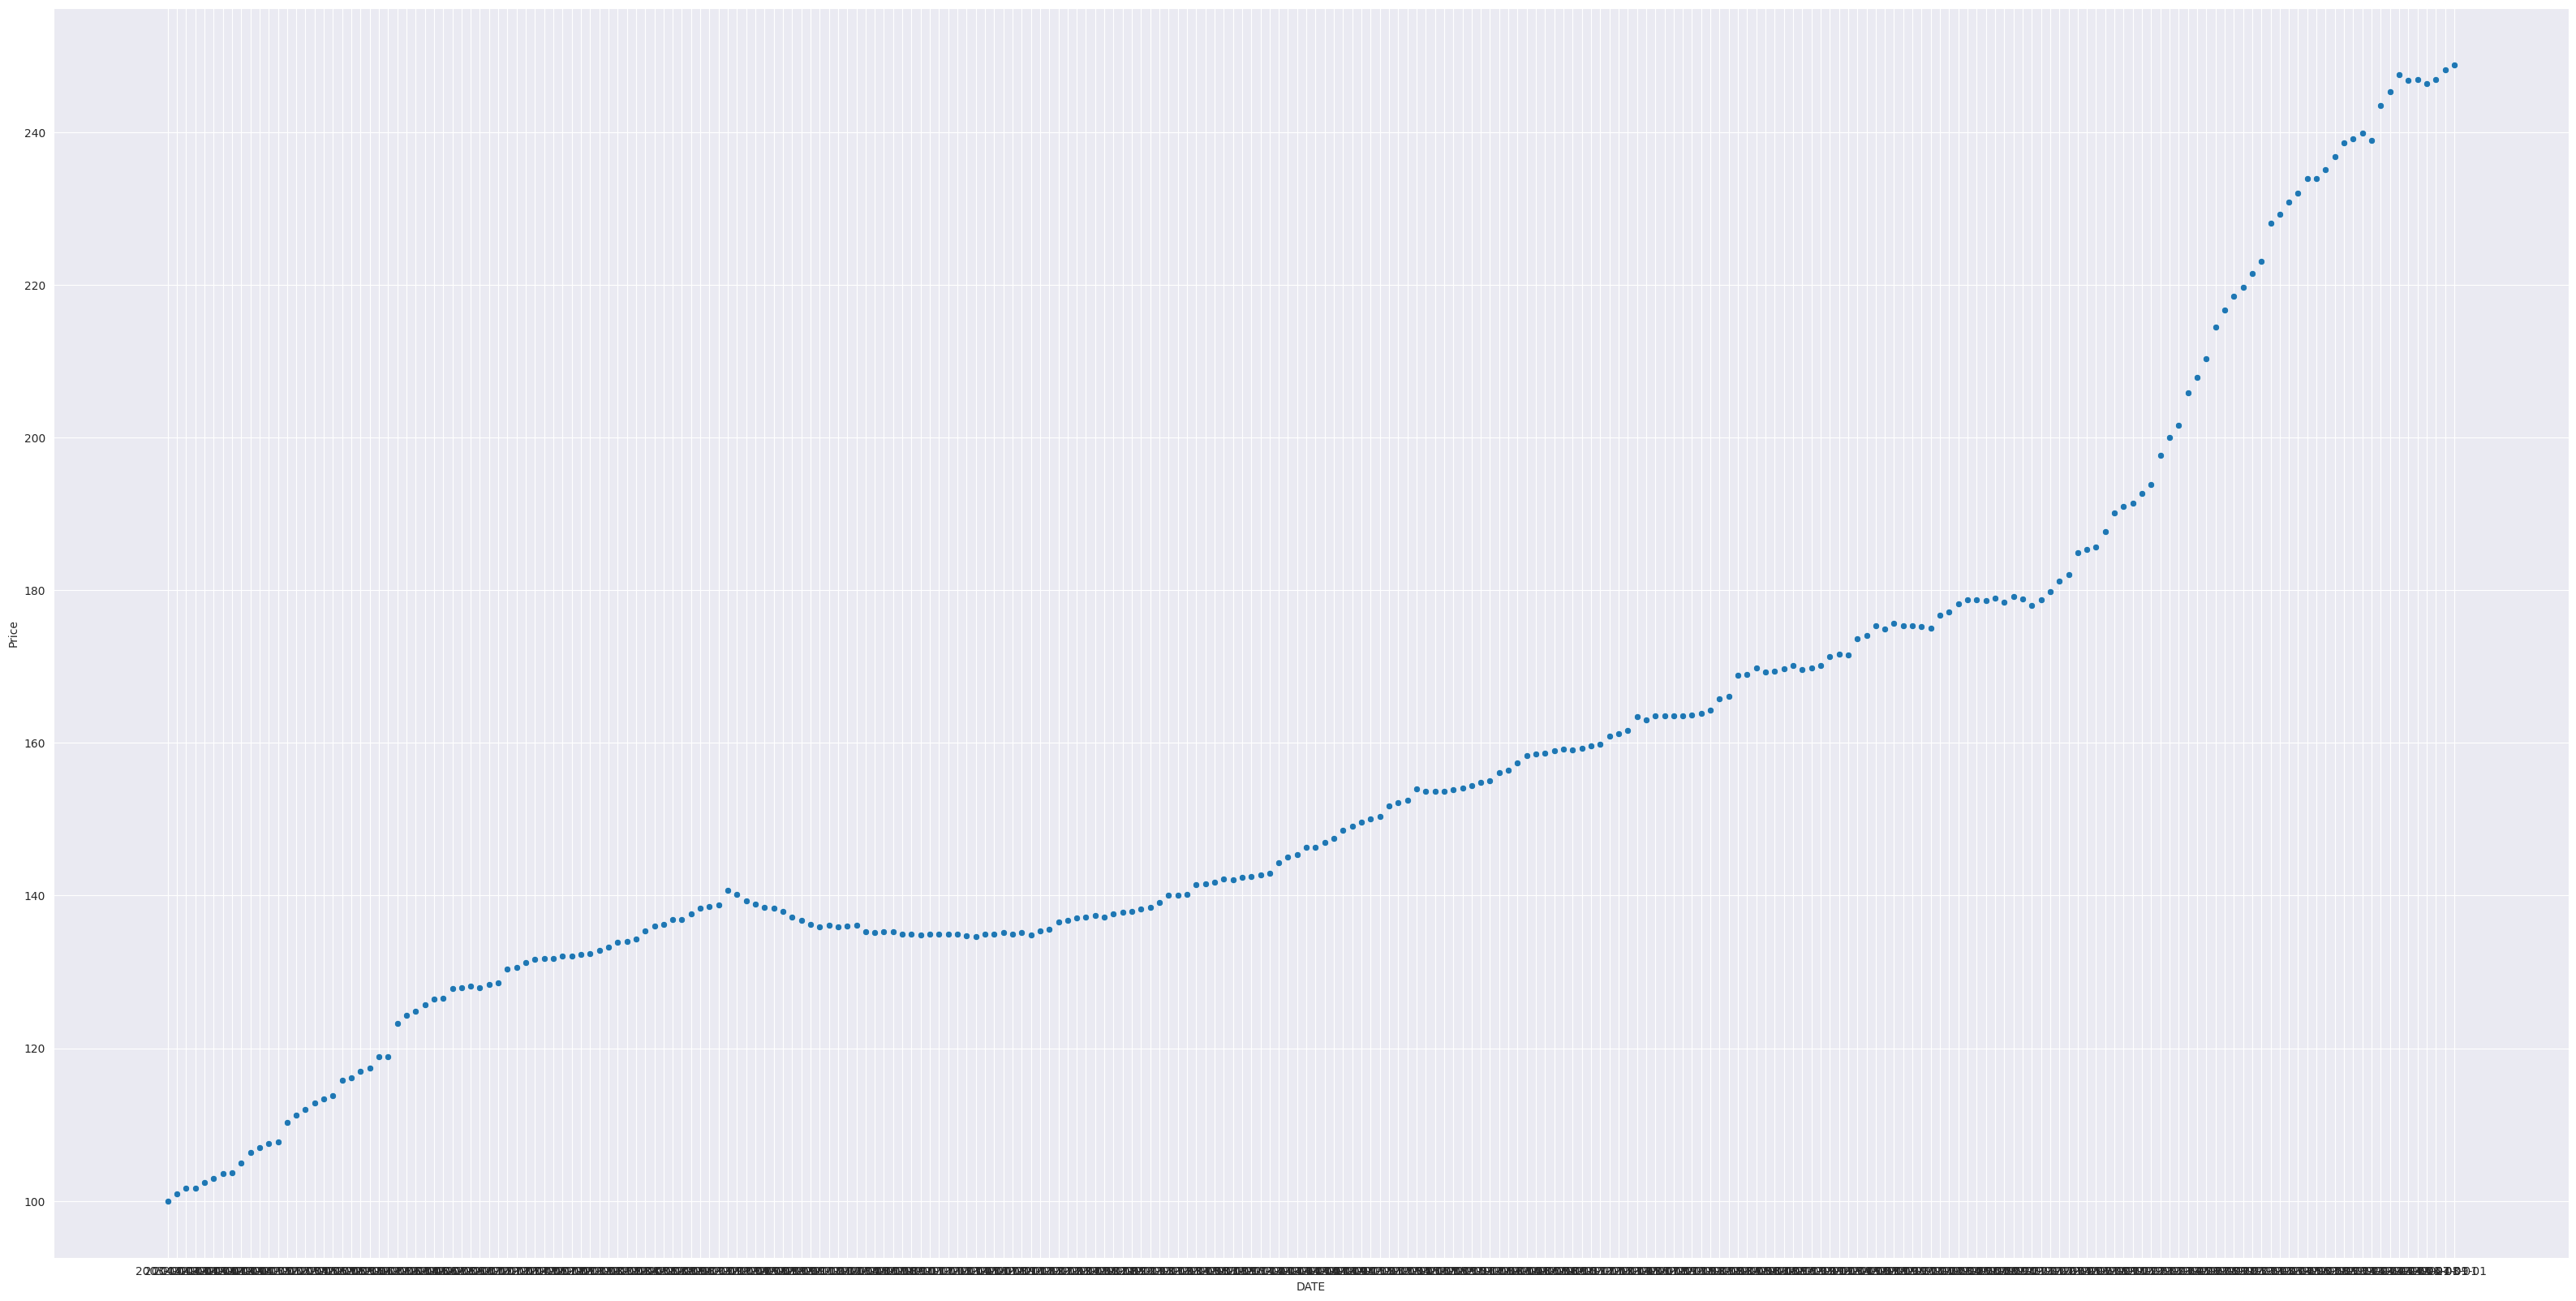

In [55]:
plt.figure(figsize=(40,20))
sns.scatterplot(PPI_Cement, x = PPI_Cement.columns[0], y = PPI_Cement.columns[1])

## PPI-Metals
These values are jumping around a lot more than other, need to look into whether they are outliers or if there was a reason for price spikes/dips

<Axes: xlabel='DATE', ylabel='Price'>

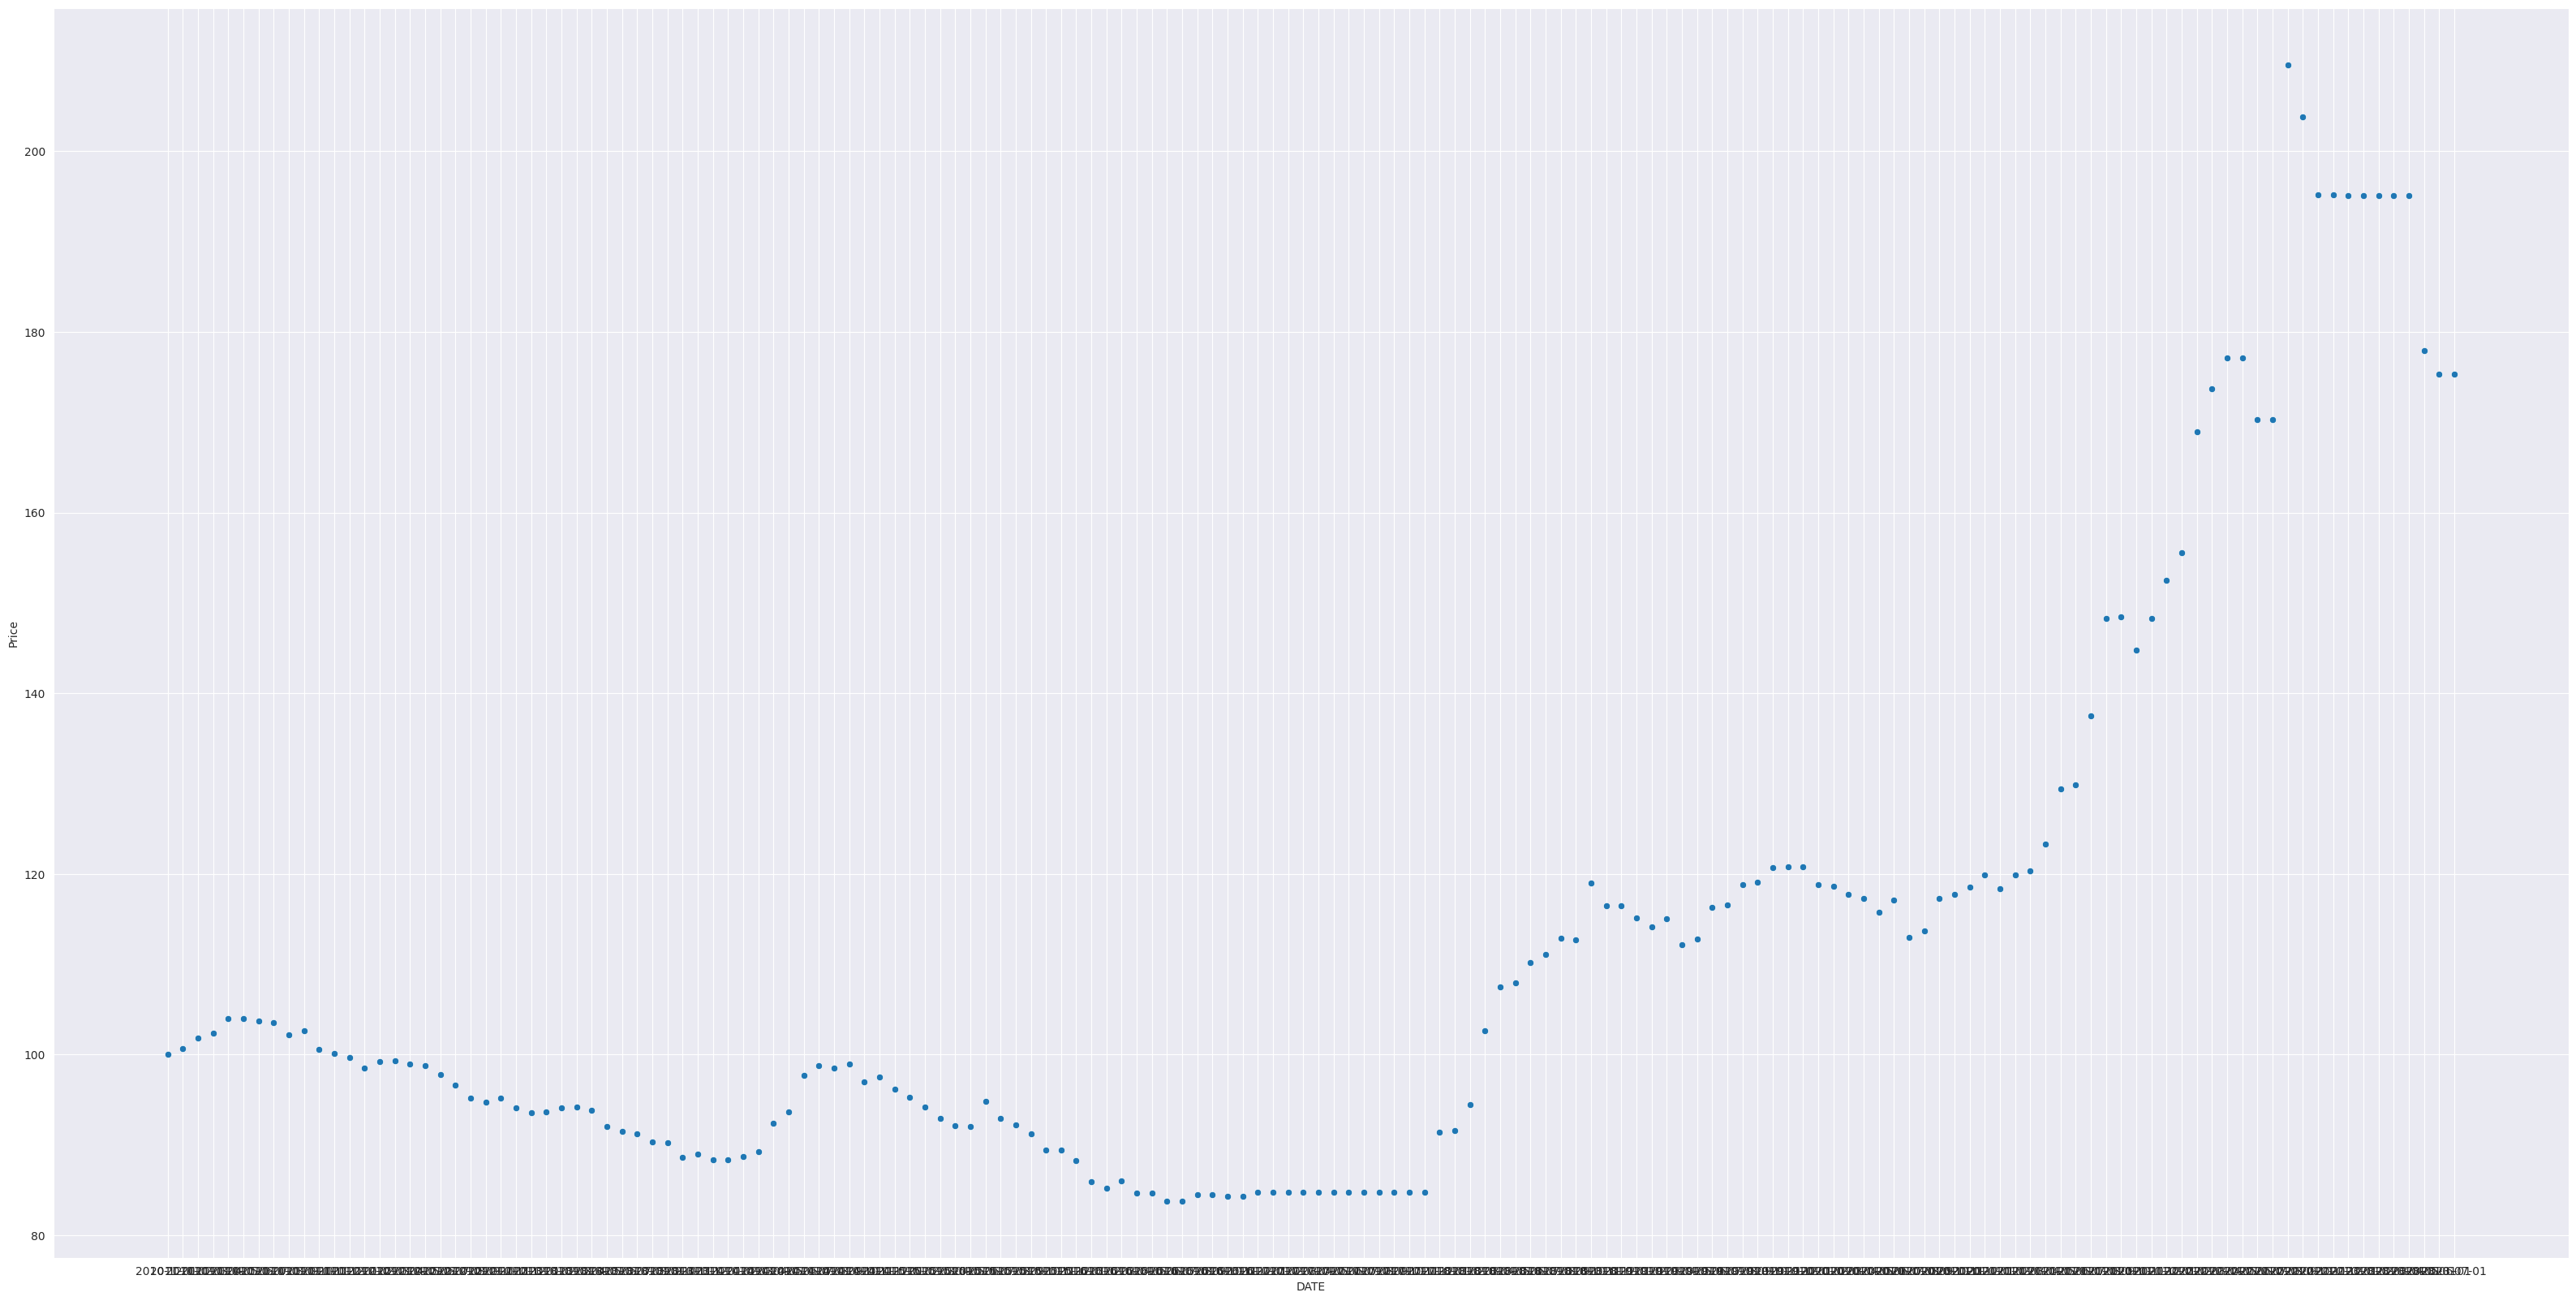

In [56]:
plt.figure(figsize=(40,20))
sns.scatterplot(PPI_Metals, x = PPI_Metals.columns[0], y = PPI_Metals.columns[1])

## Inflation
A single section has some points jumping higher than others, but it's not so far that I would consider it an outlier.

<Axes: xlabel='date', ylabel='value'>

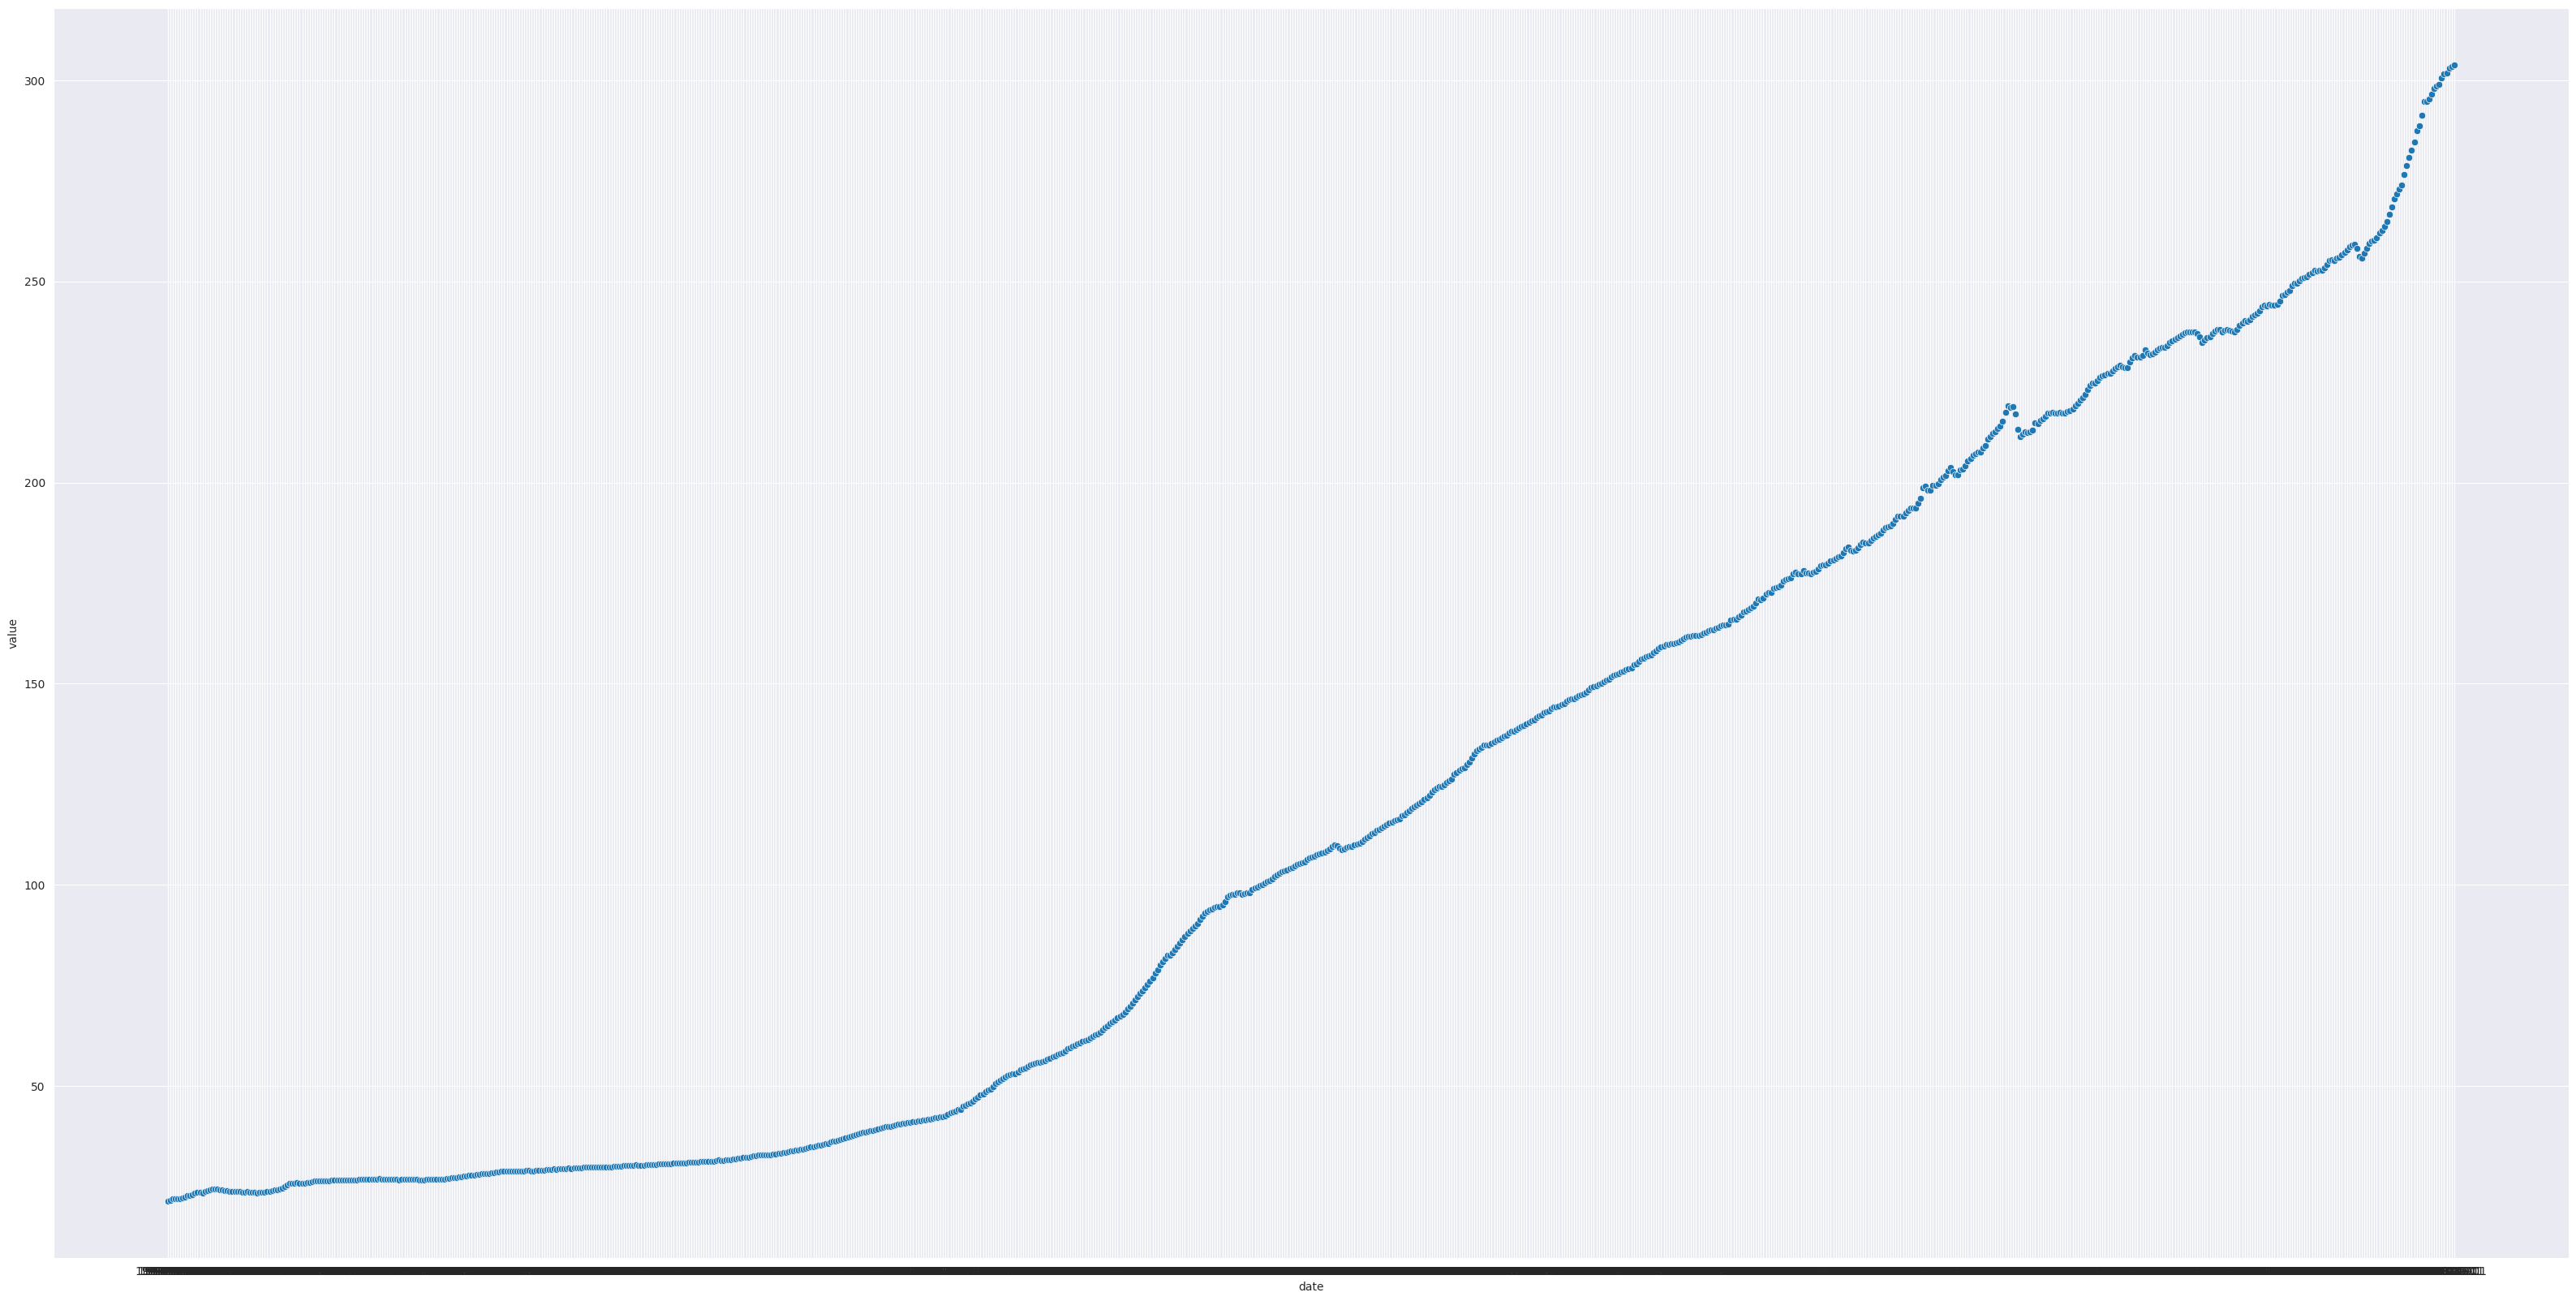

In [57]:
plt.figure(figsize=(40,20))
sns.scatterplot(Inflation, x = Inflation.columns[0], y = Inflation.columns[1])

## Commercial Real Estate
Finally a dataset I can say for certain, I'm seeing outliers on. Will need a more detailed analysis to determine cause.

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(ComRealPri, x = ComRealPri.columns[0], y = ComRealPri.columns[1])

## Sticky Price
Another dataset that seems to have a few outliers, will need to check mathematically and possibly use a trend line to be certain.

In [ ]:
plt.figure(figsize=(40,20))
sns.scatterplot(StickyPrice, x = StickyPrice.columns[0], y = StickyPrice.columns[1])